# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#06445e;">Import Libraries</p>
### ***We will use the following libraries***
### ***1. Pandas: Data manipulation and analysis***
### ***2. Numpy: Numerical operations and calculations***
### ***3. Matplotlib: Data visualization and plotting***
### ***4. Seaborn: Enhanced data visualization and statistical graphics***
### ***5. Scipy: Scientific computing and advanced mathematical operations***

In [1]:
# ============================================
# Imports & global settings  (put this at top)
# ============================================

# Core data wrangling
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Scientific / numeric helpers
import scipy as sp
import warnings
warnings.filterwarnings("ignore")      # optional, keeps the log clean

# Scikit-learn utilities
from sklearn.preprocessing   import OneHotEncoder, StandardScaler
from sklearn.compose         import ColumnTransformer, make_column_selector
from sklearn.model_selection import (train_test_split, StratifiedKFold,
                                     GridSearchCV, cross_val_score)
from sklearn.pipeline        import Pipeline
from sklearn.feature_selection import SelectFromModel

# Scikit-learn estimators
from sklearn.linear_model    import LogisticRegression
from sklearn.svm             import SVC
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier
from sklearn.neural_network  import MLPClassifier

# Scikit-learn metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, make_scorer,
                             ConfusionMatrixDisplay)

# Display options
pd.set_option('display.max_rows',    None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width',       None)
pd.set_option('display.max_colwidth', None)


In [2]:
df = (pd.read_csv("alzheimers_disease_data.csv")
        .set_index("PatientID"))


In [3]:
df.shape

(2149, 34)

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#06445e;">Dealing with the missing values</p>

### ***Dealing with the missing values is one of the most important part of the data wrangling process, we must deal with the missing values in order to get the correct insights from the data.***

In [7]:
df.isnull().sum().sort_values(ascending = False)

Age                          0
BehavioralProblems           0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
ADL                          0
Gender                       0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosis                    0
CholesterolTotal             0
DiastolicBP                  0
SystolicBP                   0
Hypertension                 0
HeadInjury                   0
Depression                   0
Diabetes                     0
CardiovascularDisease        0
FamilyHistoryAlzheimers      0
SleepQuality                 0
DietQuality                  0
PhysicalActivity             0
AlcoholConsumption           0
Smoking                      0
BMI                          0
EducationLevel               0
Ethnicit

In [8]:
# Find missing values percentage in the data
round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False) 

Age                          0.0
BehavioralProblems           0.0
CholesterolLDL               0.0
CholesterolHDL               0.0
CholesterolTriglycerides     0.0
MMSE                         0.0
FunctionalAssessment         0.0
MemoryComplaints             0.0
ADL                          0.0
Gender                       0.0
Confusion                    0.0
Disorientation               0.0
PersonalityChanges           0.0
DifficultyCompletingTasks    0.0
Forgetfulness                0.0
Diagnosis                    0.0
CholesterolTotal             0.0
DiastolicBP                  0.0
SystolicBP                   0.0
Hypertension                 0.0
HeadInjury                   0.0
Depression                   0.0
Diabetes                     0.0
CardiovascularDisease        0.0
FamilyHistoryAlzheimers      0.0
SleepQuality                 0.0
DietQuality                  0.0
PhysicalActivity             0.0
AlcoholConsumption           0.0
Smoking                      0.0
BMI       

In [9]:
# Find total number of missing values
df.isnull().sum().sum()

np.int64(0)

### ***There are no missing values.***

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#06445e;">Encode categorical variables.</p>

In [10]:
enc = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')



In [12]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [13]:
one_hot_encoding_columns = ['Gender','Ethnicity','Smoking','FamilyHistoryAlzheimers','CardiovascularDisease','Diabetes','Depression','HeadInjury','Hypertension','MemoryComplaints','BehavioralProblems','Confusion','Disorientation','PersonalityChanges','DifficultyCompletingTasks','Forgetfulness','DoctorInCharge','EducationLevel']

In [14]:
enc_transform = enc.fit_transform(df[one_hot_encoding_columns])

In [17]:
df_encoded = pd.concat([df,enc_transform],axis=1).drop(columns=one_hot_encoding_columns)

In [18]:
df_encoded.head()

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL,Diagnosis,Gender_0,Gender_1,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,Smoking_0,Smoking_1,FamilyHistoryAlzheimers_0,FamilyHistoryAlzheimers_1,CardiovascularDisease_0,CardiovascularDisease_1,Diabetes_0,Diabetes_1,Depression_0,Depression_1,HeadInjury_0,HeadInjury_1,Hypertension_0,Hypertension_1,MemoryComplaints_0,MemoryComplaints_1,BehavioralProblems_0,BehavioralProblems_1,Confusion_0,Confusion_1,Disorientation_0,Disorientation_1,PersonalityChanges_0,PersonalityChanges_1,DifficultyCompletingTasks_0,DifficultyCompletingTasks_1,Forgetfulness_0,Forgetfulness_1,DoctorInCharge_XXXConfid,EducationLevel_0,EducationLevel_1,EducationLevel_2,EducationLevel_3
PatientID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4751,73,22.927749,13.297218,6.327112,1.347214,9.025679,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,1.725883,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4752,89,26.827681,4.542524,7.619885,0.518767,7.151293,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,2.592424,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4753,73,17.795882,19.555085,7.844988,1.826335,9.673574,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,7.119548,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4754,74,33.800817,12.209266,8.428001,7.435604,8.392554,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,6.481226,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4755,89,20.716974,18.454356,6.310461,0.795498,5.597238,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0.014691,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#06445e;">Summary of preprocessing steps.</p>

### ***1.Load the dataset***
### ***I used pd.read_csv("alzheimers_disease_data.csv") to load the dataset***
### ***There are 35 columns and 2149 rows in the dataset***
### ***Source of the dataset Rabie El Kharoua. (2024). 🧠 Alzheimer's Disease Dataset 🧠 [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/8668279***

### ***2.Handling missing values***
### ***I checked for missing values using df.isnull().sum().sort_values(ascending = False)***
### ***There was no missing values, and thus no action needed***

### ***3.Encdoing categorical variables***
### ***The following categorical vairalbes where encoded ['Gender','Ethnicity','EducationLevel','Smoking','FamilyHistoryAlzheimers','CardiovascularDisease','Diabetes','Depression','HeadInjury','Hypertension','MemoryComplaints','BehavioralProblems','Confusion','Disorientation','PersonalityChanges','DifficultyCompletingTasks','Forgetfulness','Diagnosis']***

### ***I used One-Hot Encoding***






# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#06445e;">Exploratory Data Analysis(EDA).</p>

# Exploratory Data Analysis (EDA) on the Alzheimer’s Disease Dataset

**Notebook overview**:
1. [Load and inspect the cleaned data.(already with one-hot encoding)](#Load-and-inspect-the-cleaned-data).
2. [Perform univariate analysis to explore individual features.(including newly encoded columns).](#Perform-univariate-analysis-to-explore-individual-features)
3. [Conduct bivariate/multivariate analysis to see how features relate to each other and the target variable.](#Conduct-bivariate-or-multivariate-analysis-to-see-how-features-relate-to-each-other-and-the-target-variable)
4. Identify data qualify issues, outliers, and potential transformations.
5. Generate insights and document ideas for feature engineering.
6. Outline next steps for modeling.

<a id ='Load-and-inspect-the-cleaned-data'></a>
## 1. Load and inspect the cleaned data.(already with one-hot encoding)

In [21]:
print('Data Shape :', df_encoded.shape)
print("Columns Names :", df_encoded.columns.to_list())

# Display a snapshot of the data
df_encoded.head(5)





Data Shape : (2149, 55)
Columns Names : ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL', 'Diagnosis', 'Gender_0', 'Gender_1', 'Ethnicity_0', 'Ethnicity_1', 'Ethnicity_2', 'Ethnicity_3', 'Smoking_0', 'Smoking_1', 'FamilyHistoryAlzheimers_0', 'FamilyHistoryAlzheimers_1', 'CardiovascularDisease_0', 'CardiovascularDisease_1', 'Diabetes_0', 'Diabetes_1', 'Depression_0', 'Depression_1', 'HeadInjury_0', 'HeadInjury_1', 'Hypertension_0', 'Hypertension_1', 'MemoryComplaints_0', 'MemoryComplaints_1', 'BehavioralProblems_0', 'BehavioralProblems_1', 'Confusion_0', 'Confusion_1', 'Disorientation_0', 'Disorientation_1', 'PersonalityChanges_0', 'PersonalityChanges_1', 'DifficultyCompletingTasks_0', 'DifficultyCompletingTasks_1', 'Forgetfulness_0', 'Forgetfulness_1', 'DoctorInCharge_XXXConfid', 'EducationLevel_0',

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL,Diagnosis,Gender_0,Gender_1,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,Smoking_0,Smoking_1,FamilyHistoryAlzheimers_0,FamilyHistoryAlzheimers_1,CardiovascularDisease_0,CardiovascularDisease_1,Diabetes_0,Diabetes_1,Depression_0,Depression_1,HeadInjury_0,HeadInjury_1,Hypertension_0,Hypertension_1,MemoryComplaints_0,MemoryComplaints_1,BehavioralProblems_0,BehavioralProblems_1,Confusion_0,Confusion_1,Disorientation_0,Disorientation_1,PersonalityChanges_0,PersonalityChanges_1,DifficultyCompletingTasks_0,DifficultyCompletingTasks_1,Forgetfulness_0,Forgetfulness_1,DoctorInCharge_XXXConfid,EducationLevel_0,EducationLevel_1,EducationLevel_2,EducationLevel_3
PatientID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4751,73,22.927749,13.297218,6.327112,1.347214,9.025679,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,1.725883,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4752,89,26.827681,4.542524,7.619885,0.518767,7.151293,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,2.592424,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4753,73,17.795882,19.555085,7.844988,1.826335,9.673574,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,7.119548,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4754,74,33.800817,12.209266,8.428001,7.435604,8.392554,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,6.481226,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4755,89,20.716974,18.454356,6.310461,0.795498,5.597238,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0.014691,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


<a id='Perform-univariate-analysis-to-explore-individual-features'></a>
## 2. Perform univariate analysis to explore individual features.


In [23]:
# 2.1 Numberical Features

numeric_cols = ['Age','BMI','AlcoholConsumption','PhysicalActivity','DietQuality','SleepQuality','SystolicBP','DiastolicBP','CholesterolTotal','CholesterolLDL','CholesterolHDL','CholesterolTriglycerides','MMSE','FunctionalAssessment','ADL']

In [24]:
df.describe()


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,0.252210,0.144253,0.150768,0.200558,0.092601,0.148906,134.264774,89.847836,225.197519,124.335944,59.463533,228.281496,14.755132,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,0.434382,0.351428,0.357906,0.400511,0.289940,0.356079,25.949352,17.592496,42.542233,43.366584,23.139174,101.986721,8.613151,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.005312,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.000000,74.000000,190.252963,87.195798,39.095698,137.583222,7.167602,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,91.000000,225.086430,123.342593,59.768237,230.301983,14.441660,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000,105.000000,262.031657,161.733733,78.939050,314.839046,22.161028,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,119.000000,299.993352,199.965665,99.980324,399.941862,29.991381,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


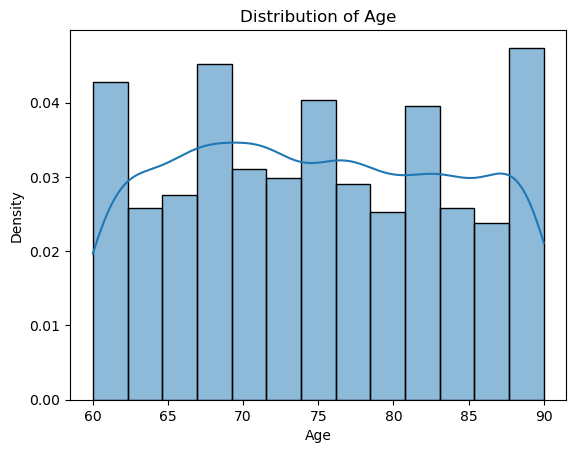

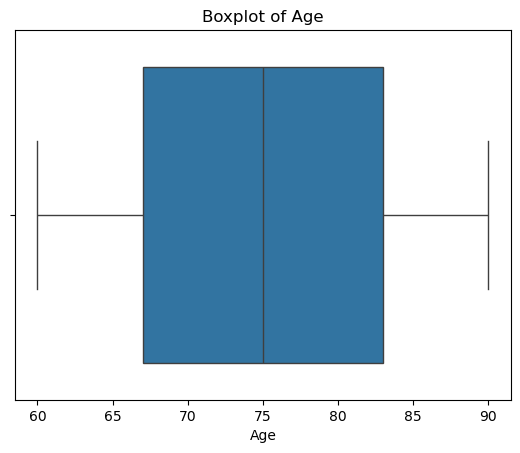

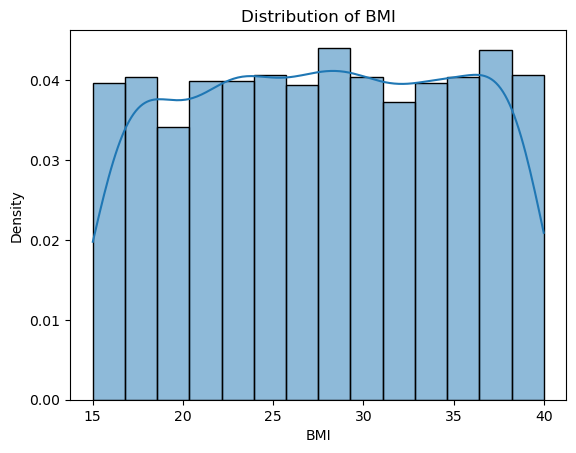

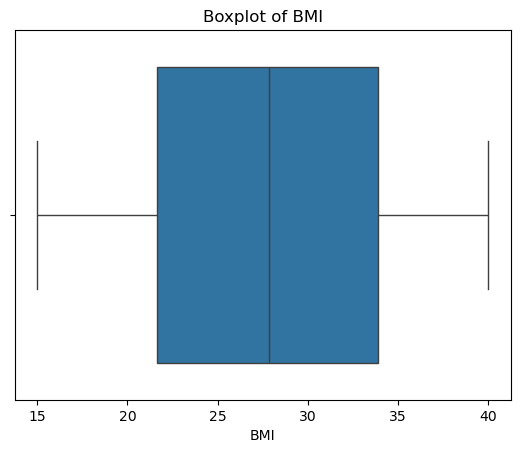

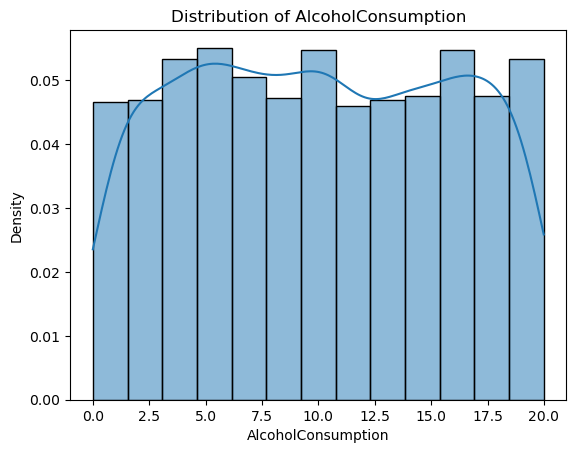

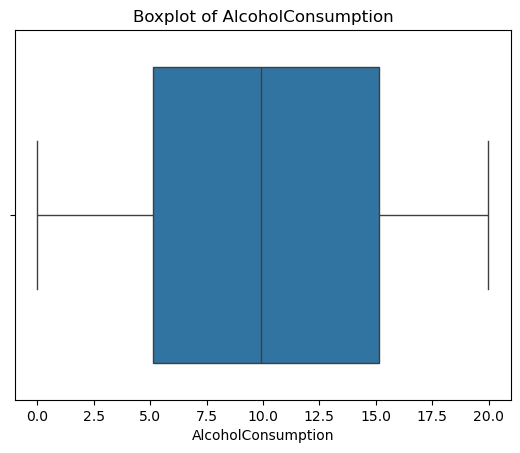

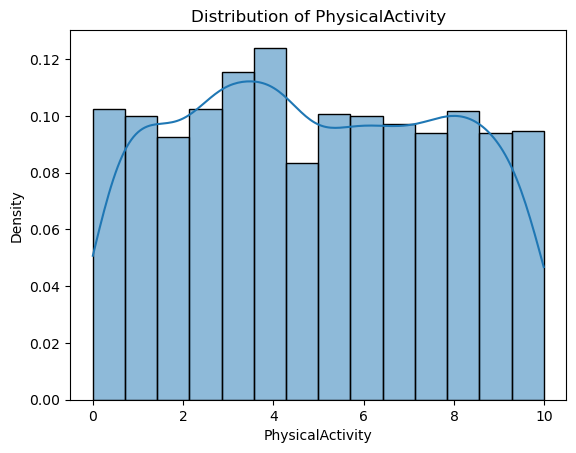

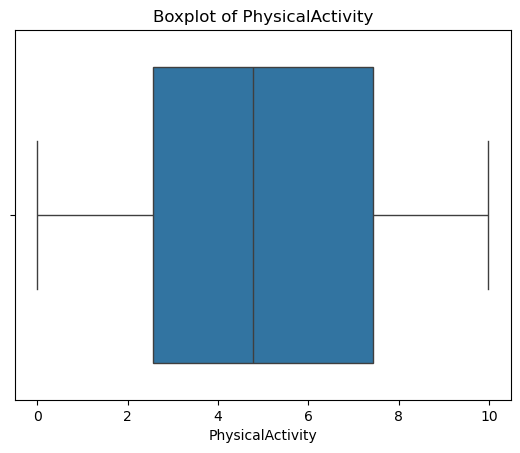

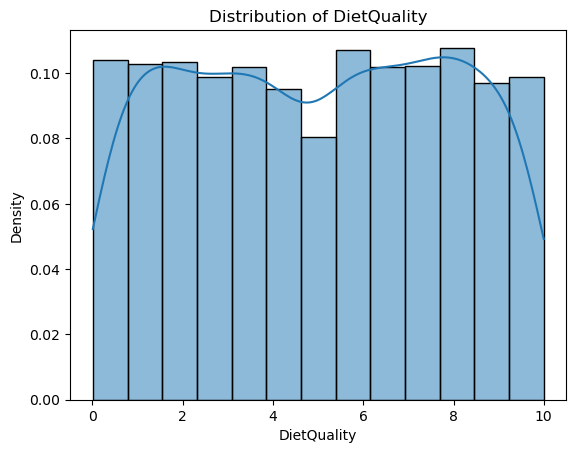

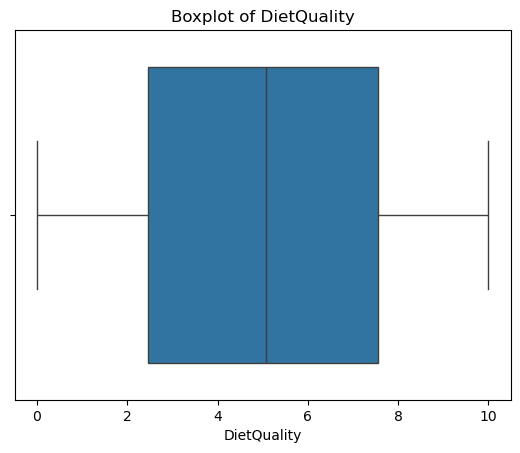

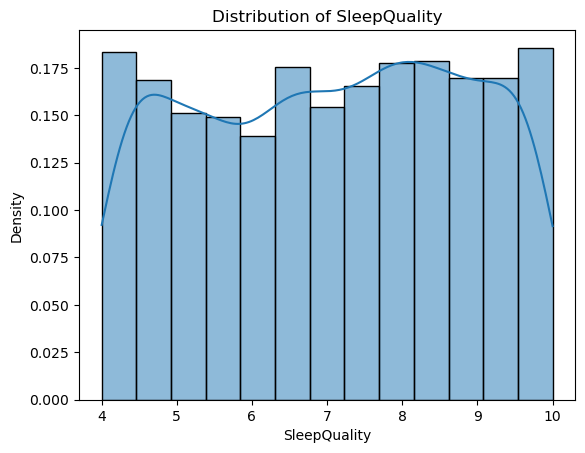

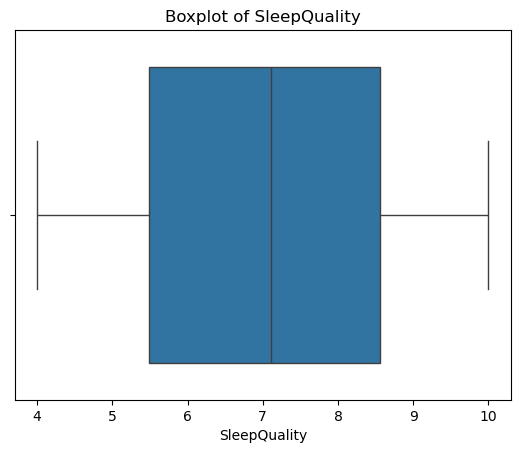

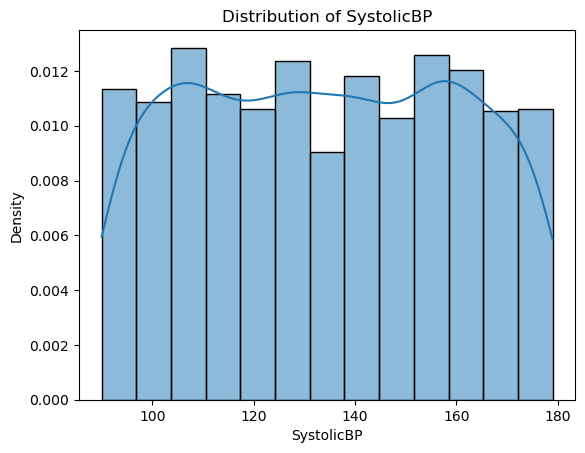

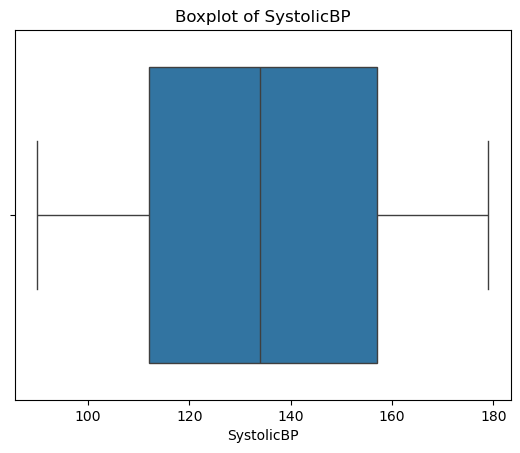

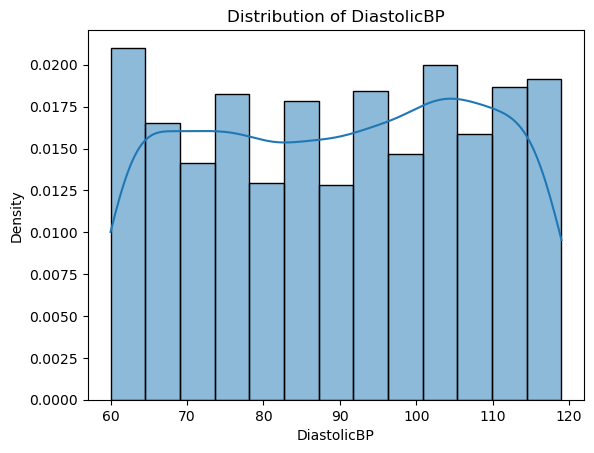

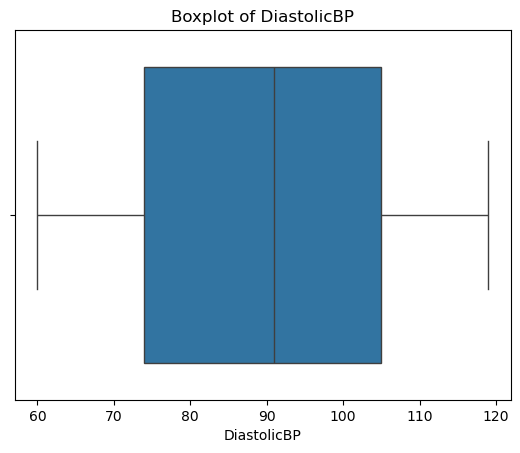

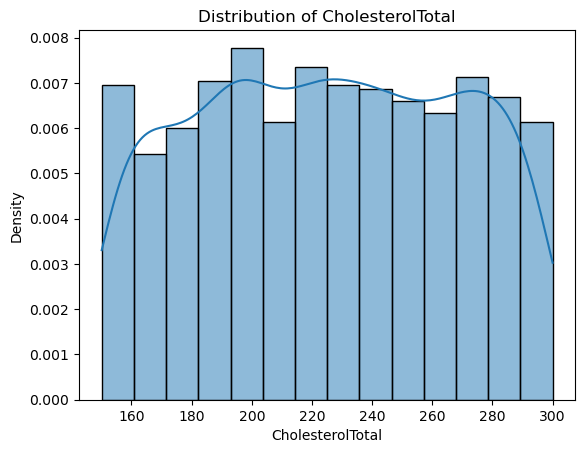

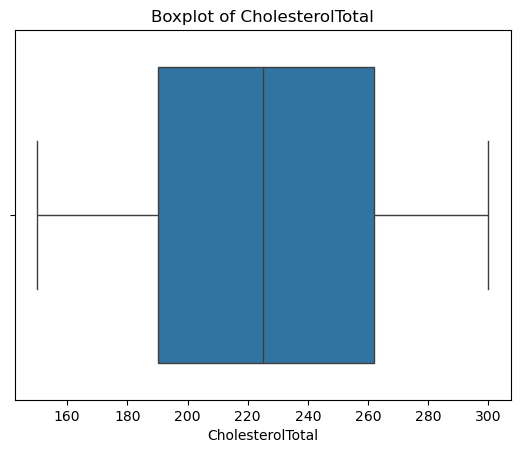

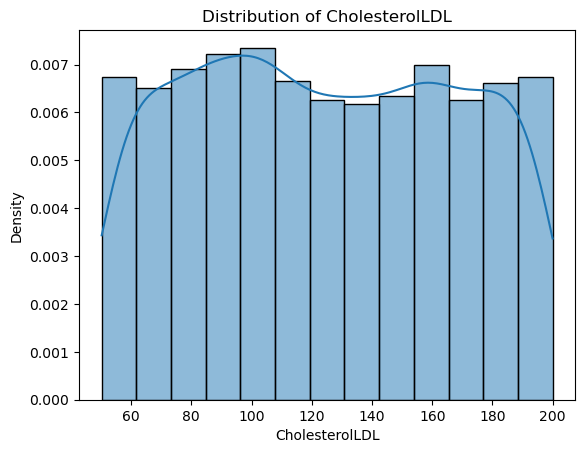

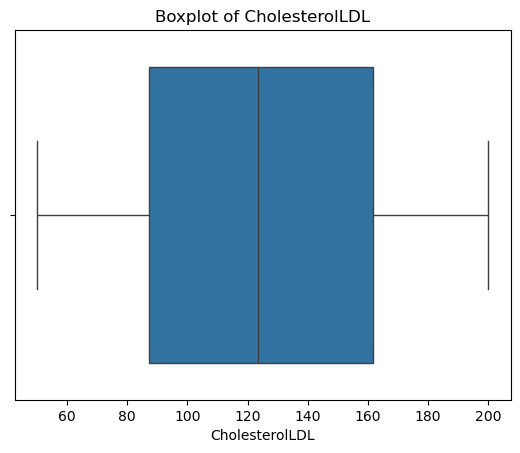

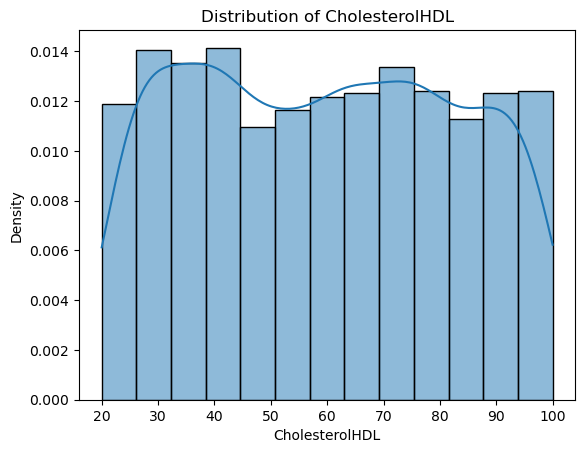

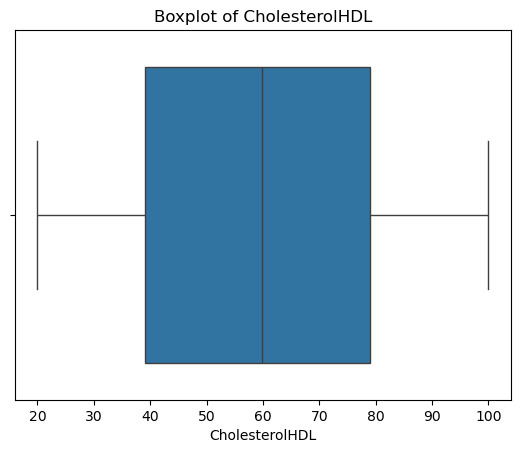

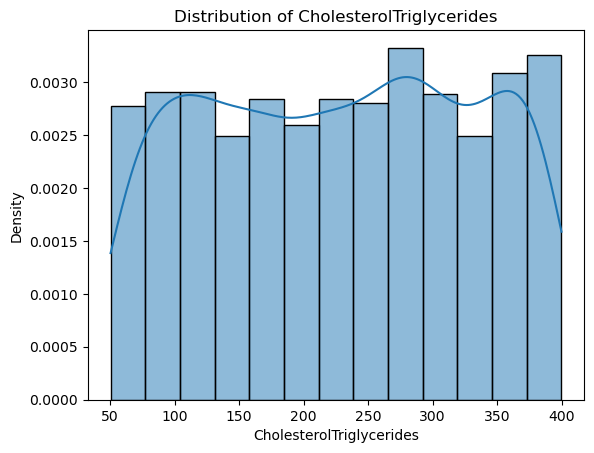

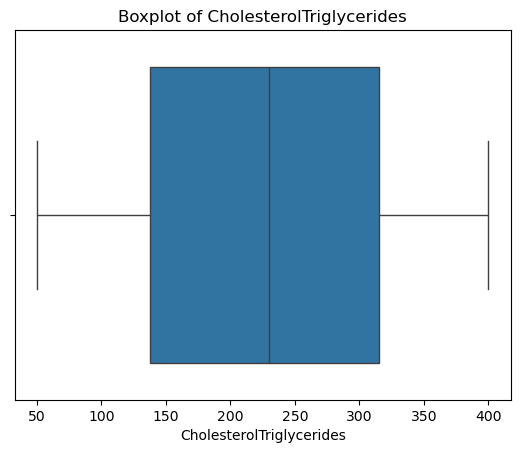

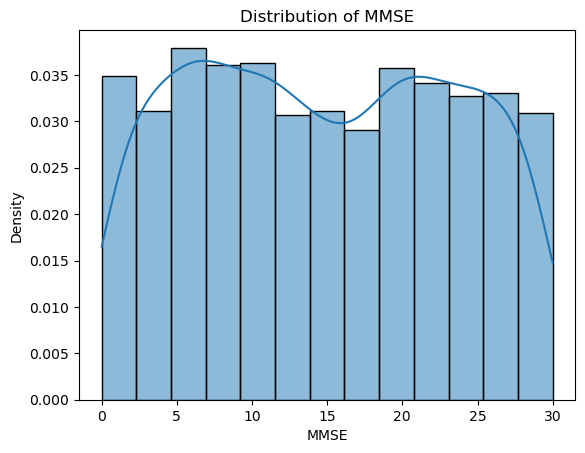

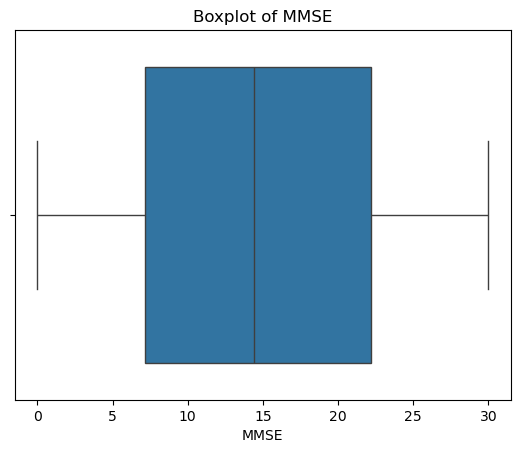

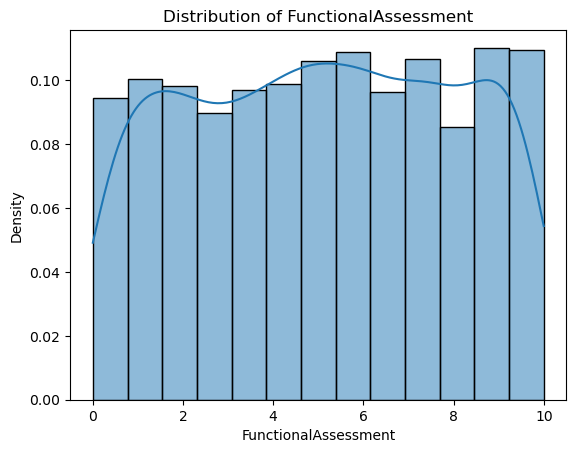

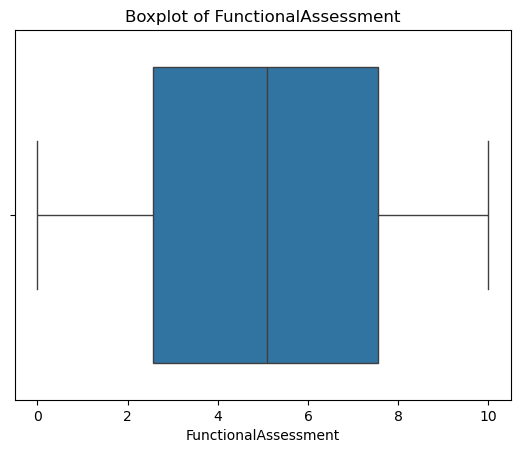

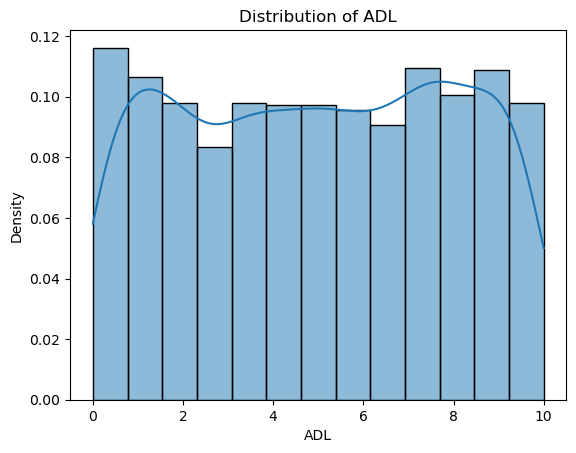

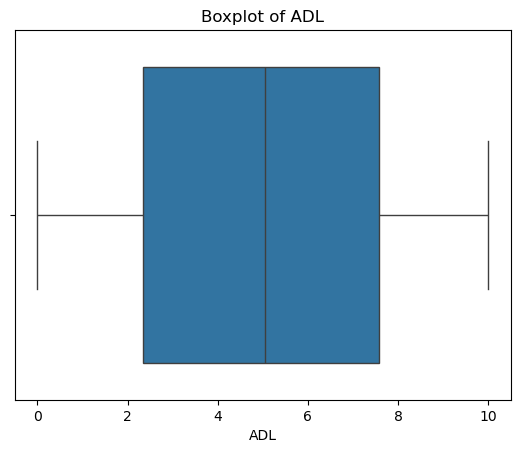

In [25]:
for col in numeric_cols:
    plt.figure()
    sns.histplot(data=df, x=col, kde=True, stat='density')
    plt.title(f'Distribution of {col}')
    plt.show()

    # Boxplot to check for outliers
    plt.figure()
    sns.boxplot(data=df,x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()


**Things to note:**
- Are there columns with extreme values.
- Is the distribution skewed?
1. Age: No, No
2. BMI: No, No
3. AlcoholConsumption: No, No
4. PhysicalActivity: No, No
5. DietQuality: No, No
6. SleepQuality: No, No
7. SystolicBP: No, No
8. DiastelicBP: No, No
9. CholestrolTotal: No, No
11. CholestrolLDL: No, No
12. CholestrolHDL: No, No
13. MMSE: No, No
14. FunctionalAssessment: No, No
15. ADL: No, No


Value counts for Gender:
Gender
1    1088
0    1061
Name: count, dtype: int64



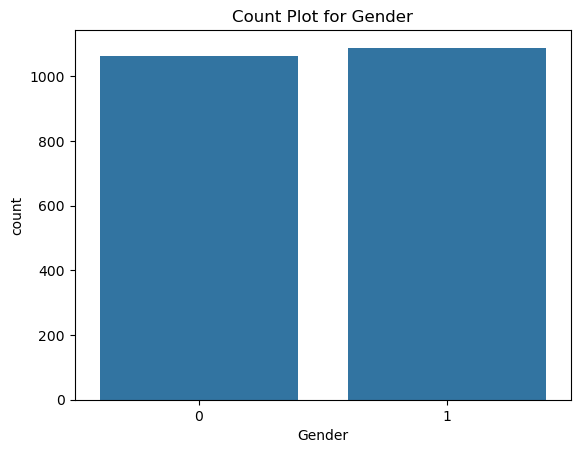

Value counts for Ethnicity:
Ethnicity
0    1278
1     454
3     211
2     206
Name: count, dtype: int64



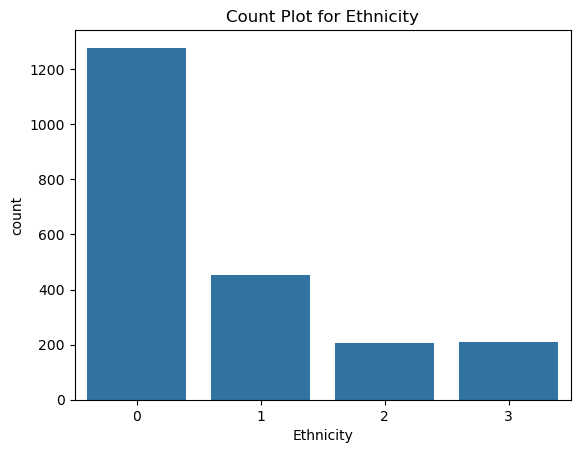

Value counts for EducationLevel:
EducationLevel
1    854
2    636
0    446
3    213
Name: count, dtype: int64



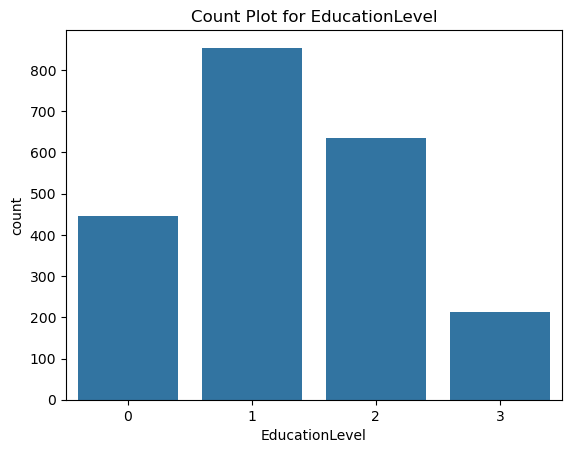

Value counts for Smoking:
Smoking
0    1529
1     620
Name: count, dtype: int64



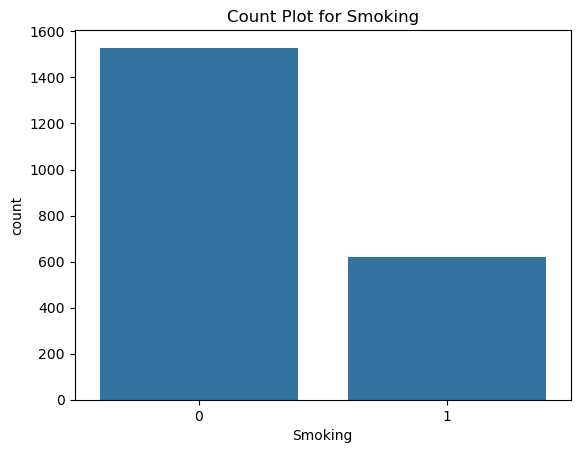

Value counts for FamilyHistoryAlzheimers:
FamilyHistoryAlzheimers
0    1607
1     542
Name: count, dtype: int64



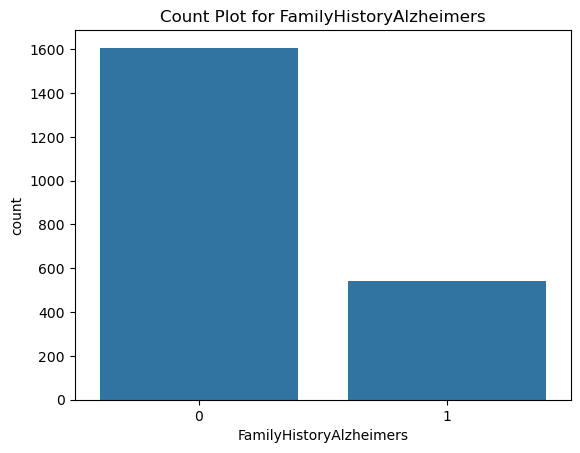

Value counts for CardiovascularDisease:
CardiovascularDisease
0    1839
1     310
Name: count, dtype: int64



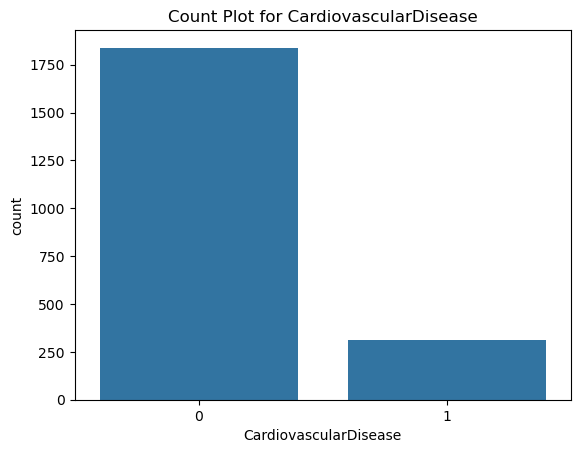

Value counts for Diabetes:
Diabetes
0    1825
1     324
Name: count, dtype: int64



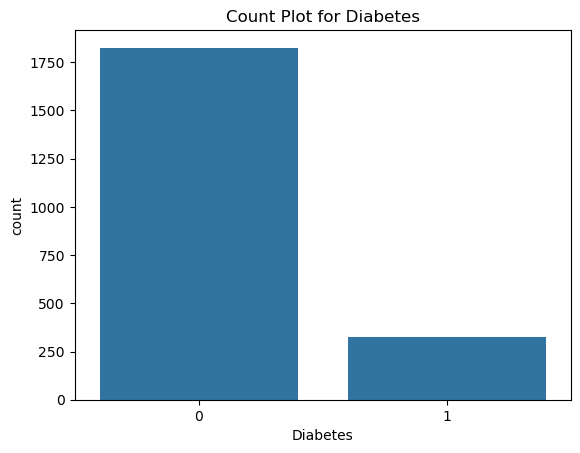

Value counts for Depression:
Depression
0    1718
1     431
Name: count, dtype: int64



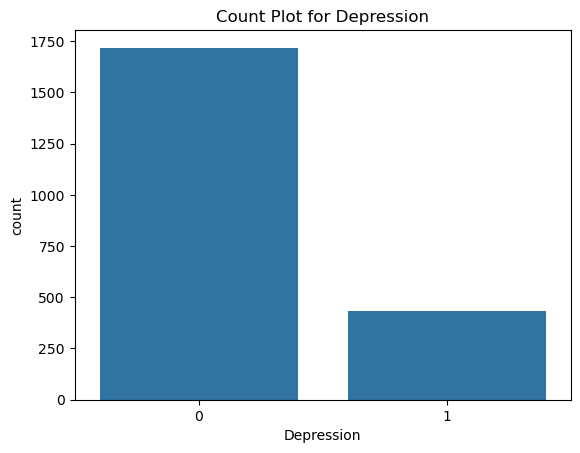

Value counts for HeadInjury:
HeadInjury
0    1950
1     199
Name: count, dtype: int64



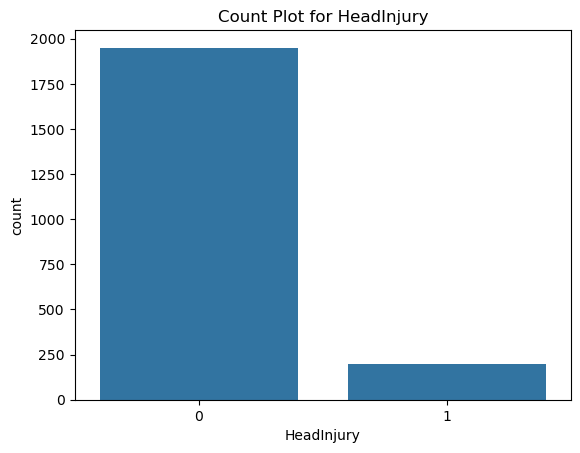

Value counts for Hypertension:
Hypertension
0    1829
1     320
Name: count, dtype: int64



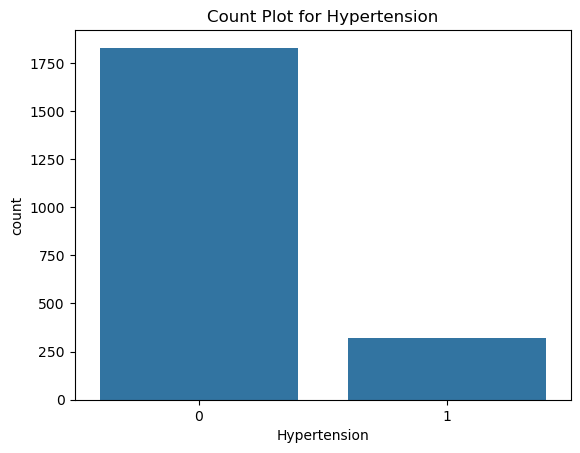

Value counts for MemoryComplaints:
MemoryComplaints
0    1702
1     447
Name: count, dtype: int64



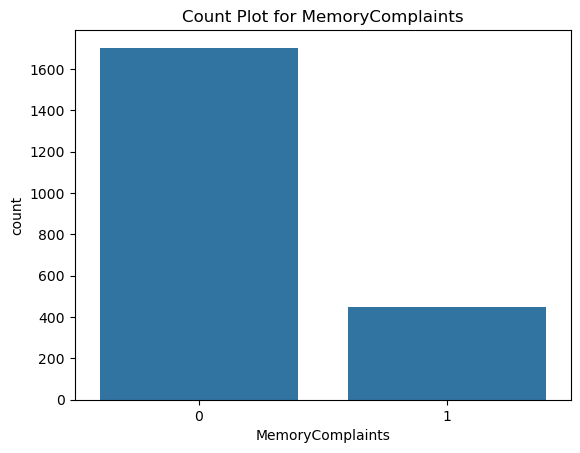

Value counts for BehavioralProblems:
BehavioralProblems
0    1812
1     337
Name: count, dtype: int64



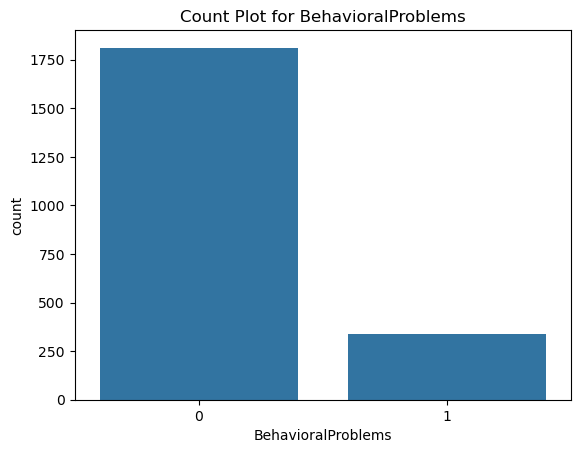

Value counts for Confusion:
Confusion
0    1708
1     441
Name: count, dtype: int64



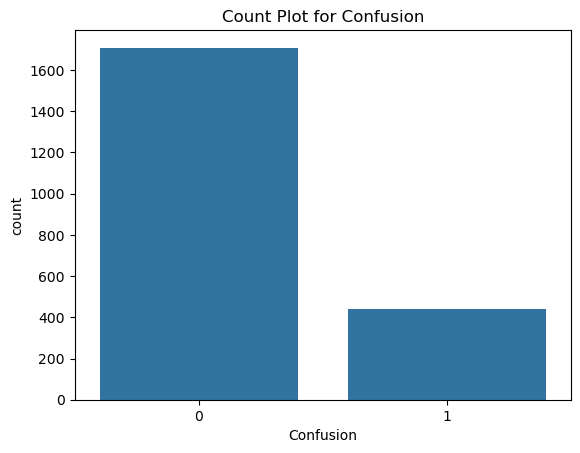

Value counts for Disorientation:
Disorientation
0    1809
1     340
Name: count, dtype: int64



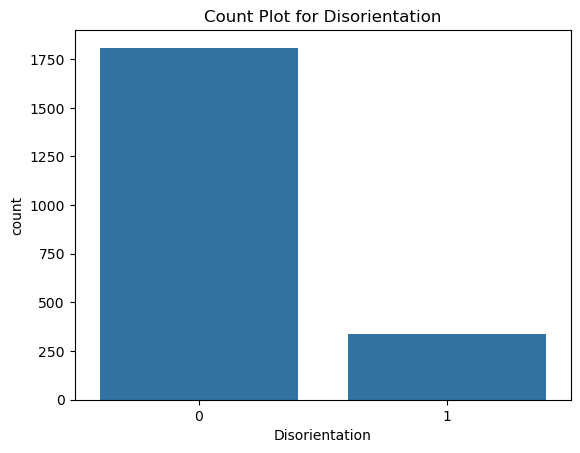

Value counts for PersonalityChanges:
PersonalityChanges
0    1825
1     324
Name: count, dtype: int64



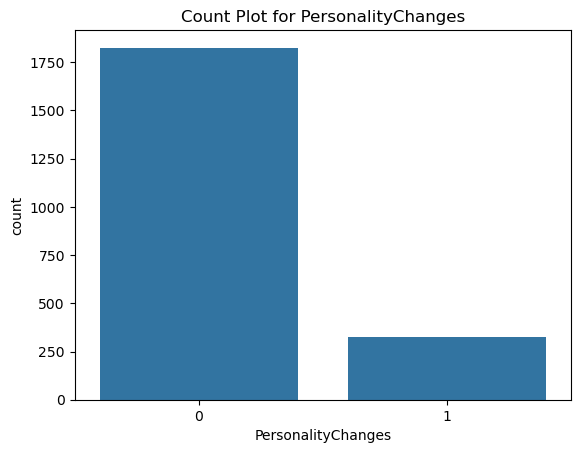

Value counts for DifficultyCompletingTasks:
DifficultyCompletingTasks
0    1808
1     341
Name: count, dtype: int64



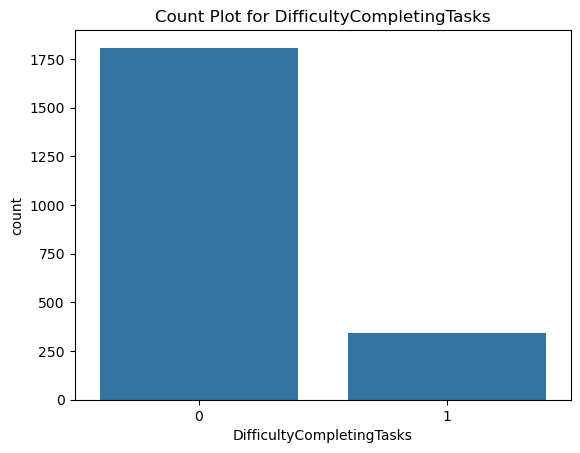

Value counts for Forgetfulness:
Forgetfulness
0    1501
1     648
Name: count, dtype: int64



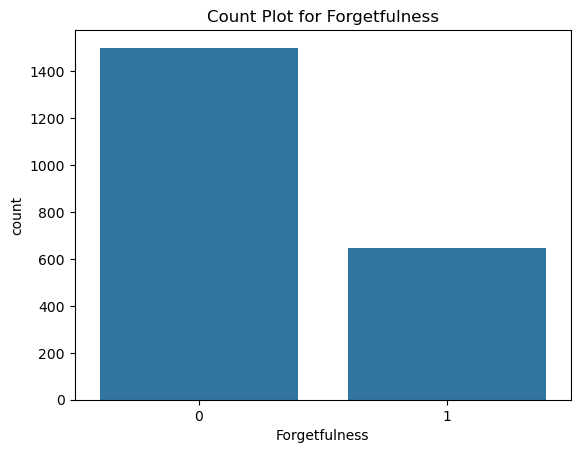

Value counts for Diagnosis:
Diagnosis
0    1389
1     760
Name: count, dtype: int64



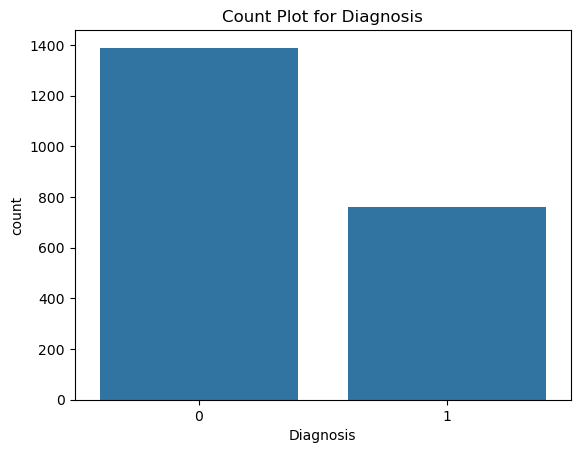

Value counts for DoctorInCharge:
DoctorInCharge
XXXConfid    2149
Name: count, dtype: int64



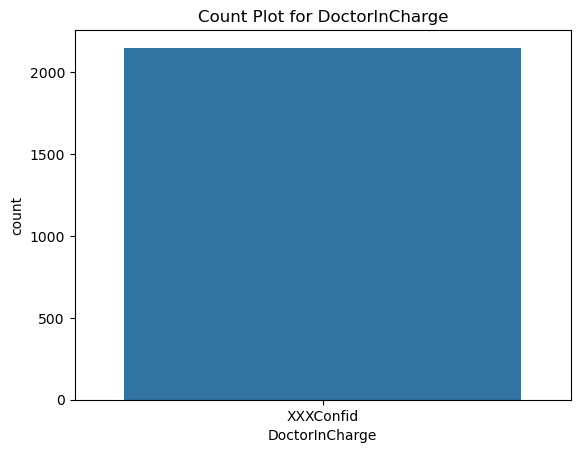

In [26]:
#3.2 Categorical Features
categorical_cols = ['Gender','Ethnicity','EducationLevel','Smoking','FamilyHistoryAlzheimers','CardiovascularDisease','Diabetes','Depression','HeadInjury','Hypertension','MemoryComplaints','BehavioralProblems','Confusion','Disorientation','PersonalityChanges','DifficultyCompletingTasks','Forgetfulness','Diagnosis','DoctorInCharge']

for col in categorical_cols:
    print(f'Value counts for {col}:\n{df[col].value_counts()}\n')
    plt.figure()
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot for {col}')
    plt.show()

**Things to note:**
- Are categories balanced or imbalanced?
- Any unexpected category codes?

1. PatientID: Balanced, No
2. Gander: Balanced, No
3. Ethnicity: Imbalanced, No
4. EducationLevel: Imbalanced, No
5. Smoking: Imbalanced, No
6. FamilyHistoryAlzaheimers: Imbalanced, No
7. CardioVascularDisease:Imbalanced, No
8. Diabetes: Imbalance, No
9. Depression: Imbalance, No
10. HeadInjury: Imbalance, No
11. Hypertension: Imbalance, No
12. MemoryComplaints: Imbalance, No
13. BehavioralProblems: Imbalance, No
14. Confusion: Imbalance, No
15. Disorientation: Imbalance, No
16. PersonalityChanges: Imbalance, No
17. DifficultyCompletingTasks: Imbalance, No
18. Forgetfulness: Imbalance, No
19. Dignosis: Imbalance, No
20. DoctorInCharge: Imbalance, No


<a id='Conduct-bivariate-or-multivariate-analysis-to-see-how-features-relate-to-each-other-and-the-target-variable'></a>
## 3. Conduct bivariate/multivariate abalysis to see how features relate to each other and the target variable(`Diagnosis`).

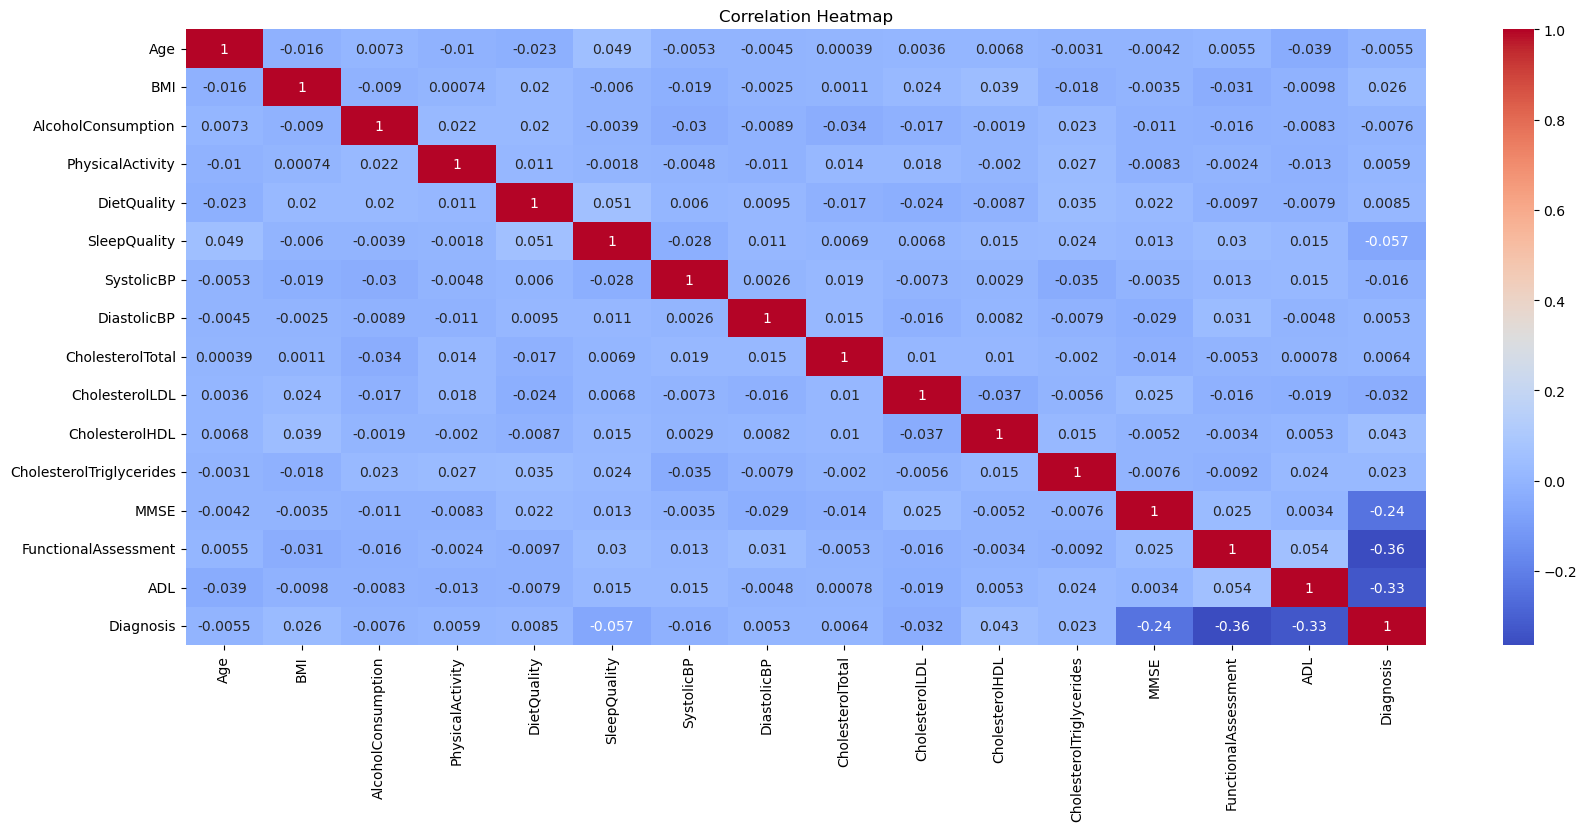

Correlation with Diagnosis:
 Diagnosis                   1.000000
CholesterolHDL              0.042584
BMI                         0.026343
CholesterolTriglycerides    0.022672
DietQuality                 0.008506
CholesterolTotal            0.006394
PhysicalActivity            0.005945
DiastolicBP                 0.005293
Age                        -0.005488
AlcoholConsumption         -0.007618
SystolicBP                 -0.015615
CholesterolLDL             -0.031976
SleepQuality               -0.056548
MMSE                       -0.237126
ADL                        -0.332346
FunctionalAssessment       -0.364898
Name: Diagnosis, dtype: float64


In [27]:
# 3.1  Coreelation Matrix

corr_matrix = df[numeric_cols+['Diagnosis']].corr()

plt.figure(figsize=(20,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#Check correlation with the target if target is numeric (0/1)
if 'Diagnosis' in df.columns:
    corr_with_target = corr_matrix['Diagnosis'].sort_values(ascending=False)
    print("Correlation with Diagnosis:\n",corr_with_target)


**Things to note:**
- There are no features with |correlation| > 0.7-0.8
- The feature with the strongest correlation is FunctionalAssessment: -0.364898

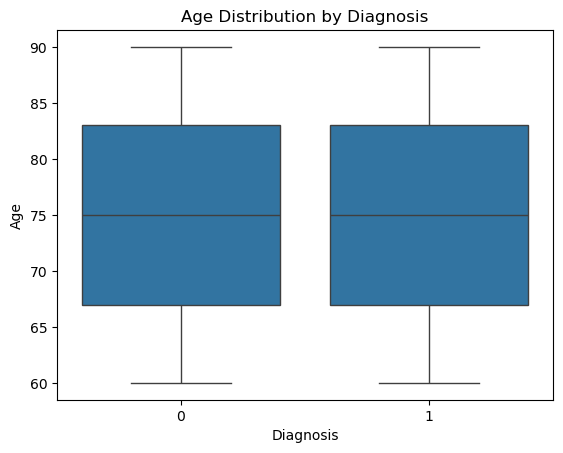

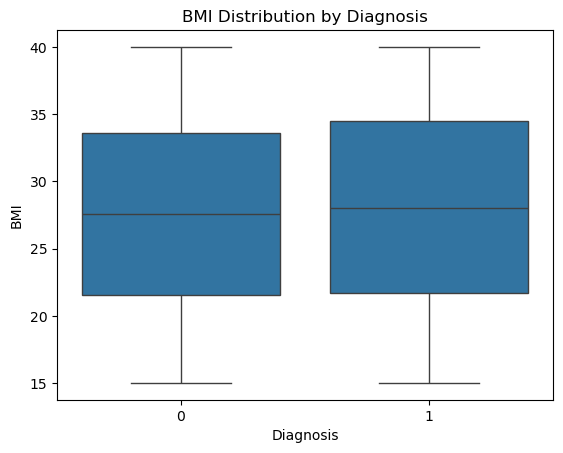

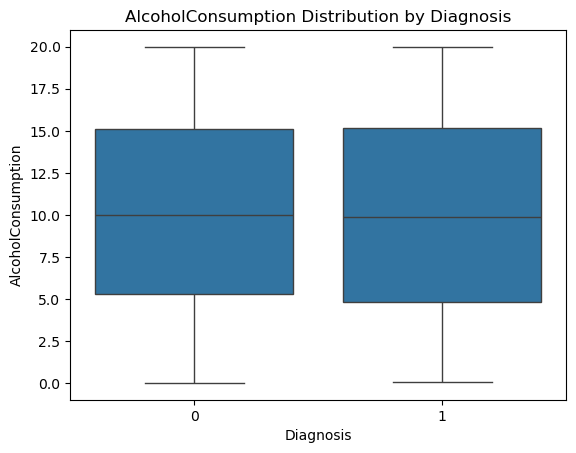

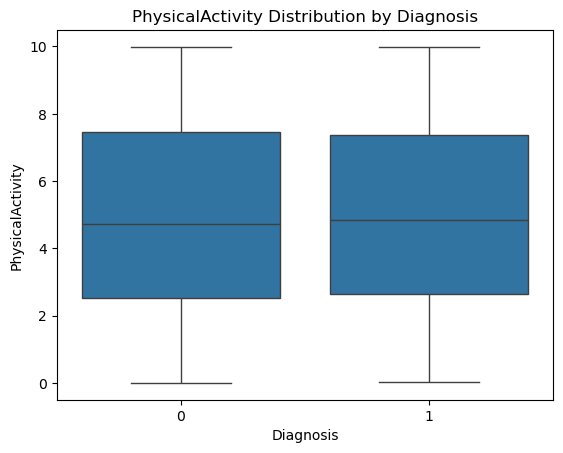

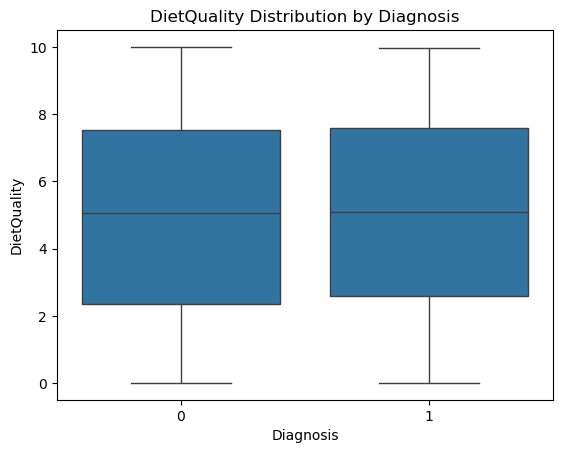

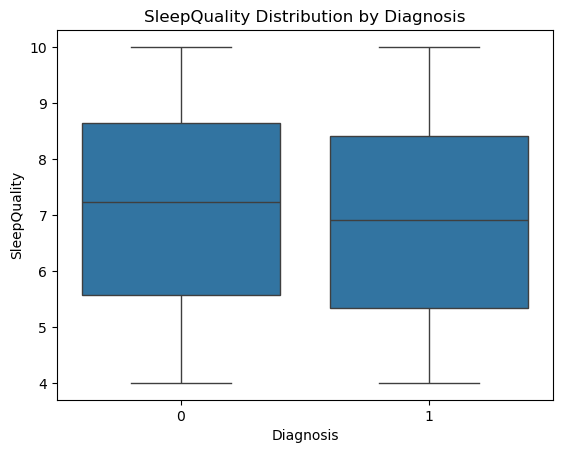

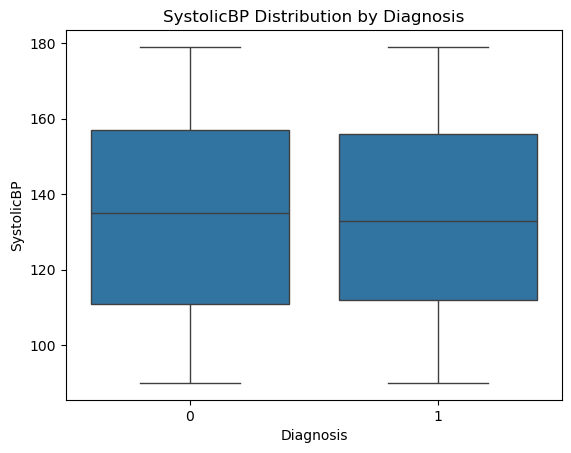

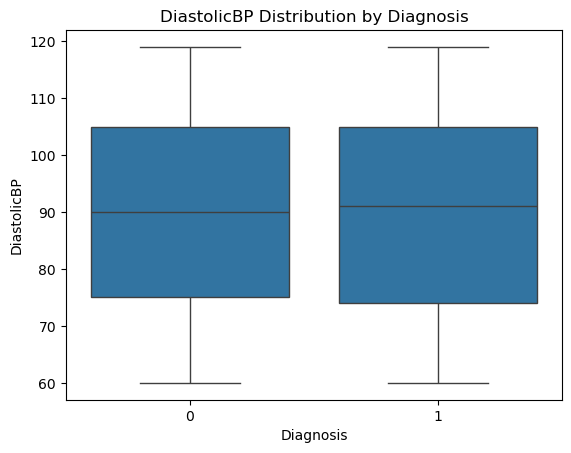

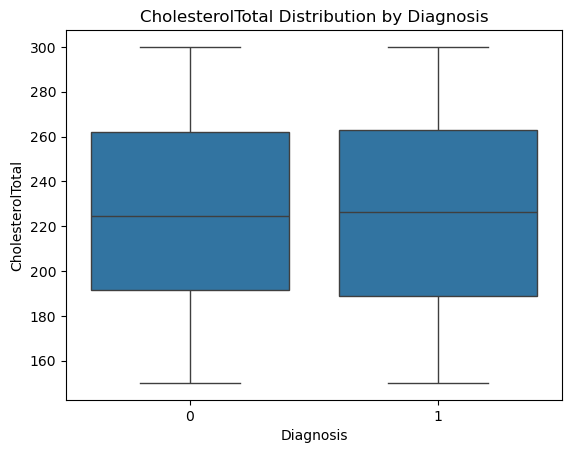

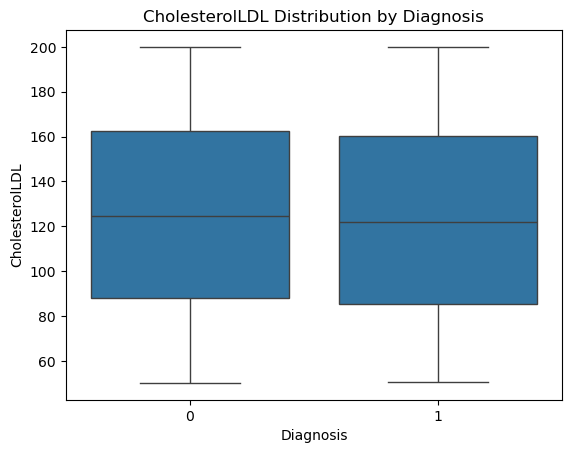

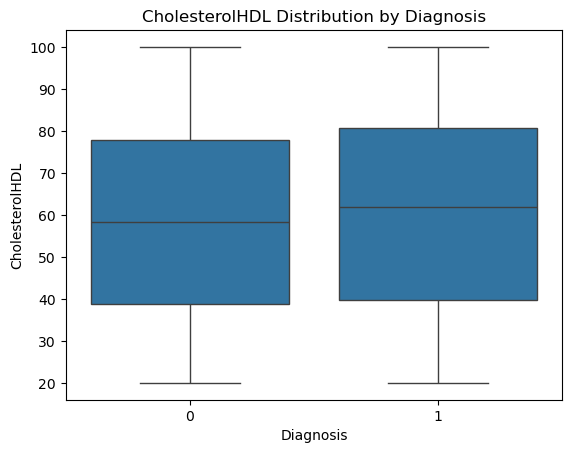

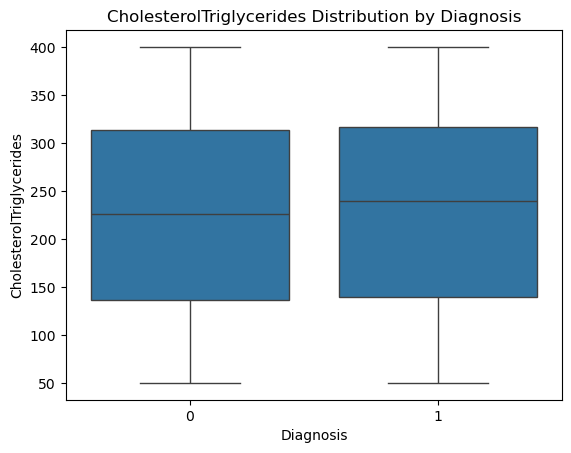

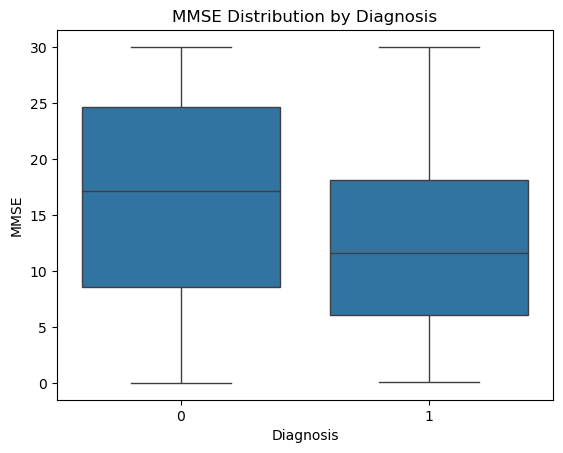

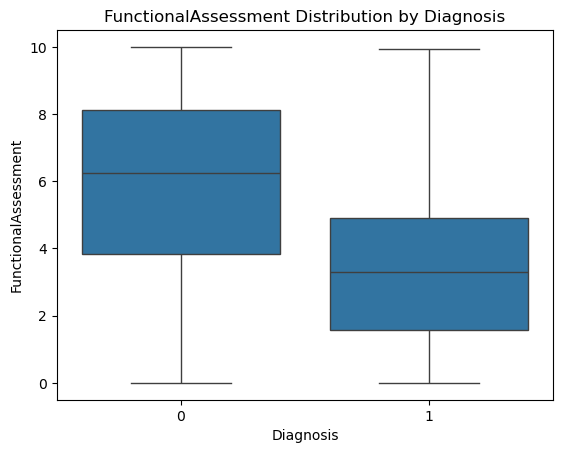

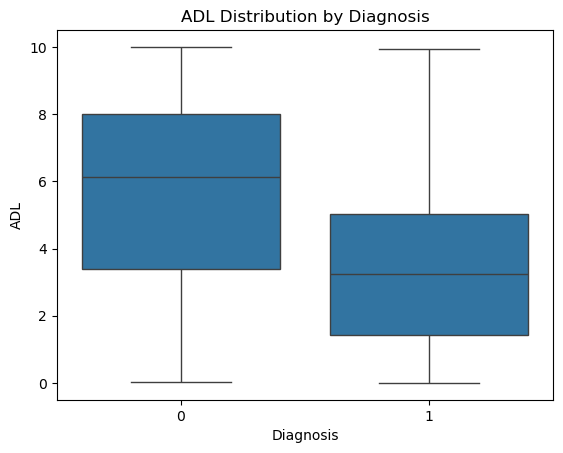


Mean Age by Diagnosis:
Diagnosis
0    74.945284
1    74.842105
Name: Age, dtype: float64

Mean BMI by Diagnosis:
Diagnosis
0    27.515092
1    27.912670
Name: BMI, dtype: float64

Mean AlcoholConsumption by Diagnosis:
Diagnosis
0    10.071880
1     9.980156
Name: AlcoholConsumption, dtype: float64

Mean PhysicalActivity by Diagnosis:
Diagnosis
0    4.90764
1    4.94316
Name: PhysicalActivity, dtype: float64

Mean DietQuality by Diagnosis:
Diagnosis
0    4.974839
1    5.026581
Name: DietQuality, dtype: float64

Mean SleepQuality by Diagnosis:
Diagnosis
0    7.124832
1    6.916292
Name: SleepQuality, dtype: float64

Mean SystolicBP by Diagnosis:
Diagnosis
0    134.564435
1    133.717105
Name: SystolicBP, dtype: float64

Mean DiastolicBP by Diagnosis:
Diagnosis
0    89.778978
1    89.973684
Name: DiastolicBP, dtype: float64

Mean CholesterolTotal by Diagnosis:
Diagnosis
0    224.996342
1    225.565197
Name: CholesterolTotal, dtype: float64

Mean CholesterolLDL by Diagnosis:
Diagnosis
0  

In [20]:
# 3.2 Numeric vs. Target
target = "Diagnosis"
for col in numeric_cols+['Diagnosis']:
    if col != target:
        plt.figure()
        sns.boxplot(x=target,y=col,data=df)
        plt.title(f'{col} Distribution by Diagnosis')
        plt.show()
    
# Alternatively, group statistics
for col in numeric_cols+['Diagnosis']:
    if col != target:
        print(f'\nMean {col} by Diagnosis:')
        print(df.groupby('Diagnosis')[col].mean())

**Things to note:**
- Do certain features(e.g., MMSE) differ markedly between diagnosed (1) and non-diagnosed(0) groups?
- Any surprising patters?

1. Age: No, Yes my prior assumption was that older individuals whould be more likely to have diagnosis. However, the age ranges in both groups are quite similar.
2. BMI: No, No
3. AlcholoConsumption: No, No
4. PhysicalActivity: No, No
5. DietQuality: No, No
6. SleepQuality: No, No
7. SystolicBP: No, No
8. DiastolicBP: No, No
9. CholesterolTotal: No,No
10. CholesterolLDL: No, No
11. ChoelsterolHDL: No, No
12. CholestrolTriglycerides: No, No
13. MMSE: Yes, No
14. FunctionalAssessment: Yes, No
15. ADl: Yes, No

Cross-tab of Gender vs. Diagnosis:
Diagnosis    0    1
Gender             
0          675  386
1          714  374



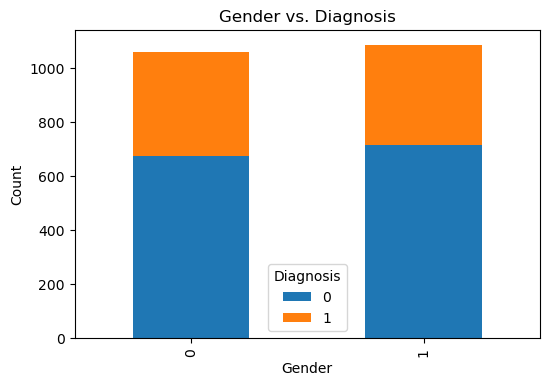

Cross-tab of Ethnicity vs. Diagnosis:
Diagnosis    0    1
Ethnicity          
0          815  463
1          308  146
2          122   84
3          144   67



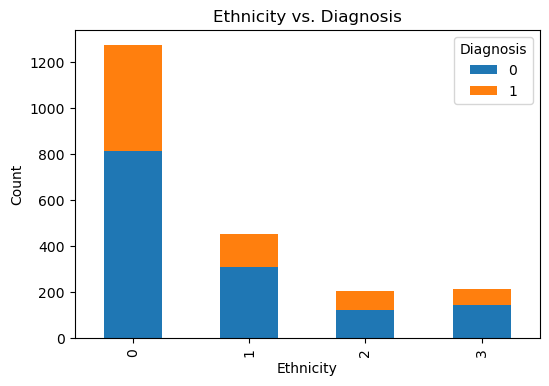

Cross-tab of EducationLevel vs. Diagnosis:
Diagnosis         0    1
EducationLevel          
0               272  174
1               552  302
2               419  217
3               146   67



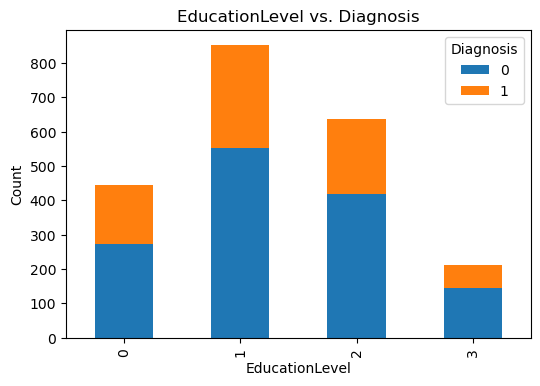

Cross-tab of Smoking vs. Diagnosis:
Diagnosis    0    1
Smoking            
0          986  543
1          403  217



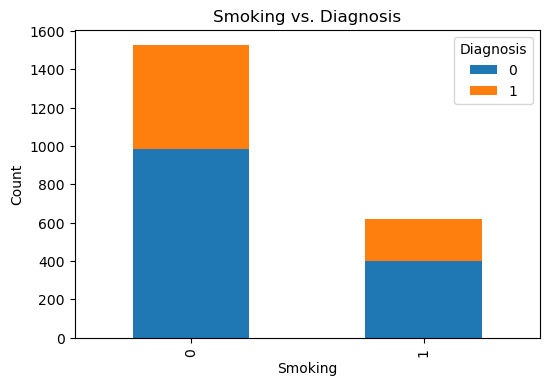

Cross-tab of FamilyHistoryAlzheimers vs. Diagnosis:
Diagnosis                   0    1
FamilyHistoryAlzheimers           
0                        1024  583
1                         365  177



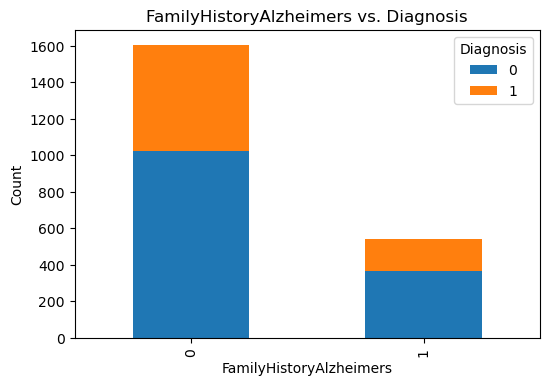

Cross-tab of CardiovascularDisease vs. Diagnosis:
Diagnosis                 0    1
CardiovascularDisease           
0                      1200  639
1                       189  121



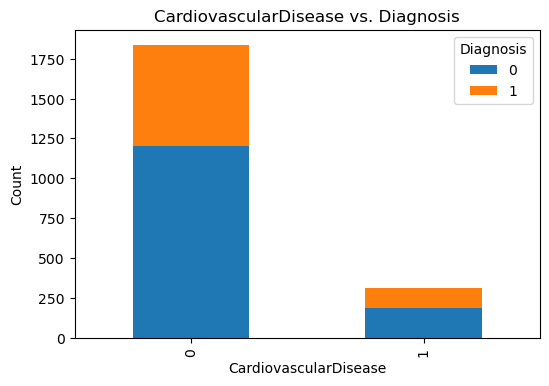

Cross-tab of Diabetes vs. Diagnosis:
Diagnosis     0    1
Diabetes            
0          1168  657
1           221  103



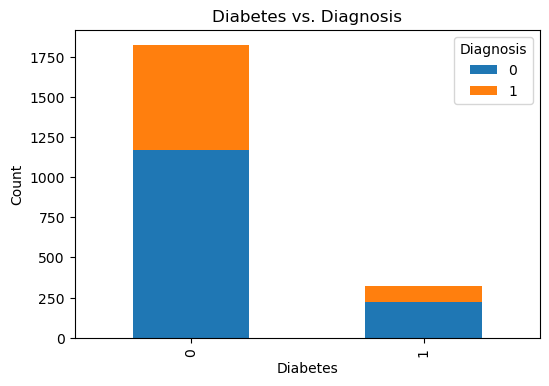

Cross-tab of Depression vs. Diagnosis:
Diagnosis      0    1
Depression           
0           1108  610
1            281  150



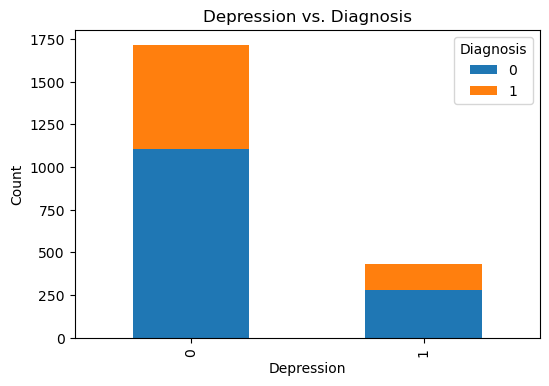

Cross-tab of HeadInjury vs. Diagnosis:
Diagnosis      0    1
HeadInjury           
0           1254  696
1            135   64



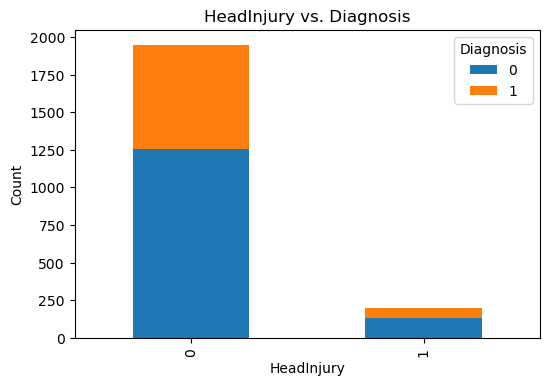

Cross-tab of Hypertension vs. Diagnosis:
Diagnosis        0    1
Hypertension           
0             1195  634
1              194  126



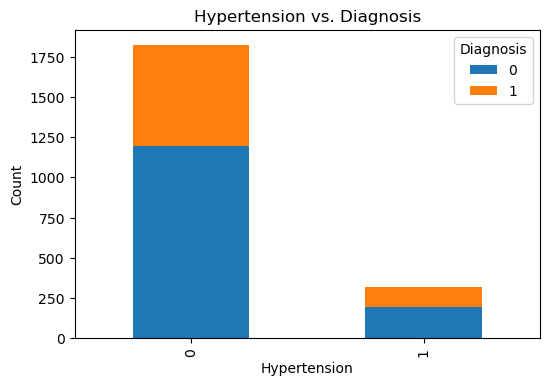

Cross-tab of MemoryComplaints vs. Diagnosis:
Diagnosis            0    1
MemoryComplaints           
0                 1228  474
1                  161  286



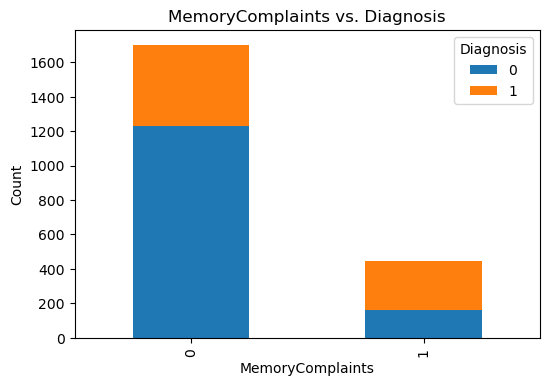

Cross-tab of BehavioralProblems vs. Diagnosis:
Diagnosis              0    1
BehavioralProblems           
0                   1255  557
1                    134  203



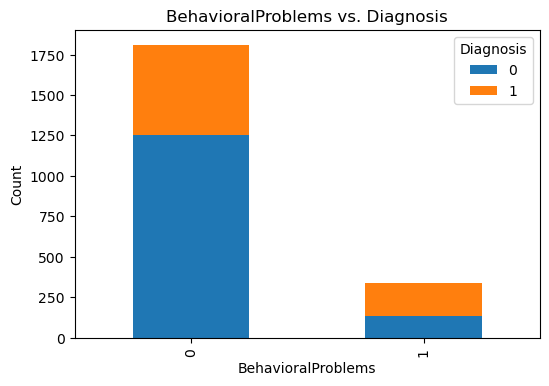

Cross-tab of Confusion vs. Diagnosis:
Diagnosis     0    1
Confusion           
0          1096  612
1           293  148



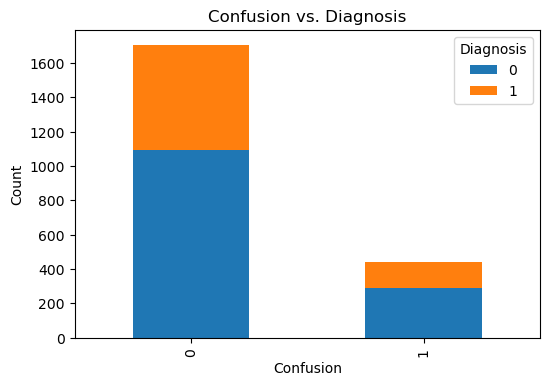

Cross-tab of Disorientation vs. Diagnosis:
Diagnosis          0    1
Disorientation           
0               1160  649
1                229  111



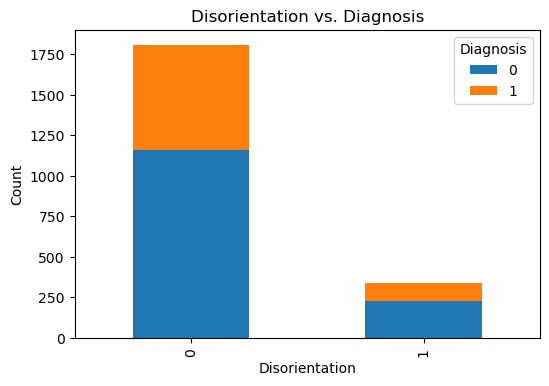

Cross-tab of PersonalityChanges vs. Diagnosis:
Diagnosis              0    1
PersonalityChanges           
0                   1172  653
1                    217  107



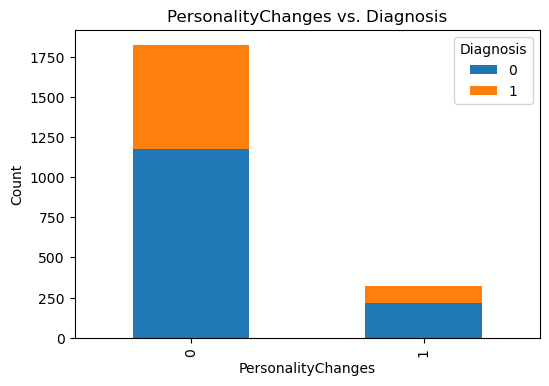

Cross-tab of DifficultyCompletingTasks vs. Diagnosis:
Diagnosis                     0    1
DifficultyCompletingTasks           
0                          1172  636
1                           217  124



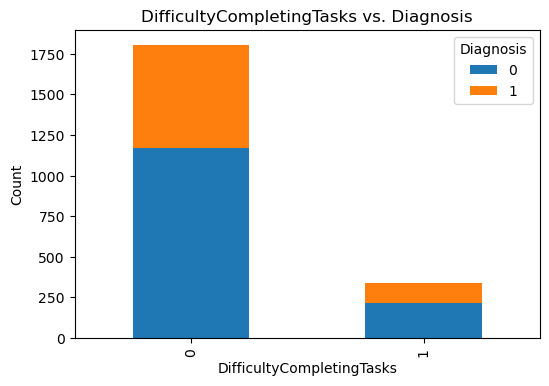

Cross-tab of Forgetfulness vs. Diagnosis:
Diagnosis        0    1
Forgetfulness          
0              970  531
1              419  229



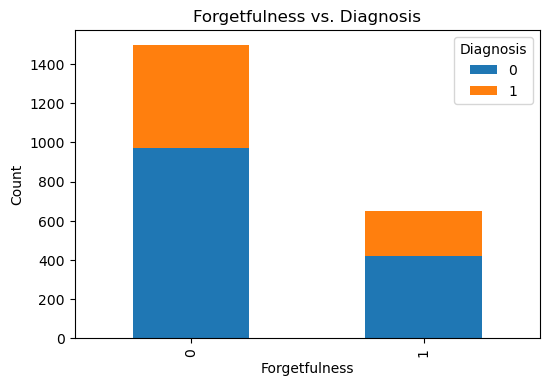

Cross-tab of DoctorInCharge vs. Diagnosis:
Diagnosis          0    1
DoctorInCharge           
XXXConfid       1389  760



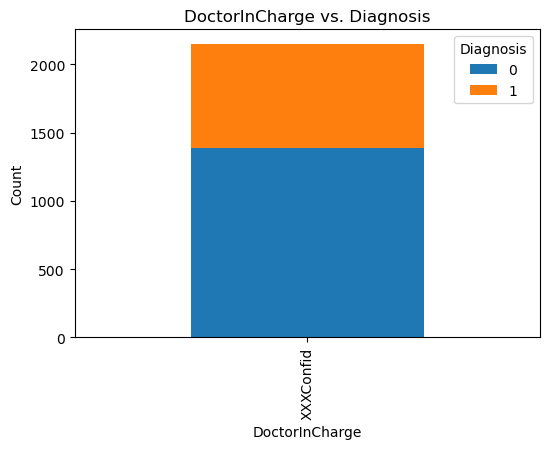

In [21]:
# 3.3 Categorical vs. Target
for col in categorical_cols+['Diagnosis']:
    if col != 'Diagnosis':
        cross_tab = pd.crosstab(df[col],df['Diagnosis'])
        print(f"Cross-tab of {col} vs. Diagnosis:\n{cross_tab}\n")
        
        # optional; plot stacked bark
        cross_tab.plot(kind='bar',stacked=True,figsize=(6,4))
        plt.title(f'{col} vs. Diagnosis')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

**Things to note:**
- Which groups(e.g. certain ethnicities or those with family history) have a higher proportion of diagnosed cases?
- Could lead to insights about risk factors.

1. PatientID: No groups found, No risk factors found.
2. Gender: 0: 36.29%, 1:34 % , male has lightly higher percentage diagnosis than woman.
3. Ethnicity: 0: 36.2%, 1: 32.2%, 2:40.8 %, 3: 31.7%, These differences may hint at varying risk factors or other underlying demographic/ clinical factors tied to ethnicity.
4. EducationLevel: 0(None): 39.0 %, 1(High school): 35.4 %, 2 (bachelor's): 34.1 %,3( Higher): 31.5 %, The studient with the least education have higher  diagnosis rate of alzheimer's then it falls down as the education increase which maches the know amongs poeple .
5. smoking: 0: 35.5 %, 1: 35.0 % , No insights about risk factors
6. FamilyHistory: 0 :36.3 %, 1: 32.7%, 0 is higher which goes againts the usual expectation that family history might inccrease the risk of alzheimer's.
7. CardioVascularDisease: 0: 35.5%, 1:34.8%, cardiovascular disease may be and associated risk factor.
8. Deepression: 0: 35.5%, 1:34.8 % , small difference, thus may not be clinically significant
9. HeadInjury: 0: 35.7 %, 1: 32.2%, small difference, While one might expect a history of head Injury to correlate with increased risk of alzheimer's . the data here shows a smaller proportion of diagnosed among that group.
10. Hypertension: 0:34.7 %, 1: 1:  39.4 %, Idnividuals with hypertension have a higher Alzheirmer's diagnosis rate(about 39%).
11. MemoryComplaints: 0:27.9%, 1: 64.0 %, clearly patients with memory complaints(1) have a much higher propotion of Alzheimer's diagnossis(64%) compared to those without memory complaints (28%).
12. BehavioralProblems: 0 :30.7%, 1: 60.2%, presence of behavioral sysmptoms is strongly associated with Alzheimer's
13. Confusion : 0:35.8 %, 1: 33.6%, oppisit to popular belive confusion is not risk factor
14. Disorientation: 0:35.9%,1: 32.6%, interestingly, patient without disporientation show a somewhat higher proportion of Alzheimer's diagnoses. this is counter intaitive since we might expect disorientatoin to be more common in those with diagnosis.
15. Personality changes: 0: 35.8%, 1: 33.0 %, group without personality changes shows slightly higher diagnosis rate, This is somewhat counterintuitive , so it's possible other factor  (like age distribution or comorbidities) play a role in shaping these resultss.
16. DifficultyCompletingTasks: 0:35.2 %, 1 : 36.4%, individuals who has difficulty completing tasks have a slightly higher diagnosis rate. The difference is samll, so further analysis would help datermine wether it's statistically significant or perhaps due to other factors(e.g. age, comorbidities, sample size, etc.).
17. Forgetfulness: 0: 35.4 %, 1: 35.3 %, There's no strong difference here, so any effect of forgetfullness on diagnosis isn't immediately evident - or it might be masked by other factors that would require further invistigation.
18. DoctorIncharge: only one category for DoctorIncharge:  35.4 %, Since there are no other DoctorIncharge categories here, this doesn't  give us a comparative insight into risk factors based on doctor assignment.

#  Single train/test split(for selecting features)

# 4. Data Quality & Anomaly Checks(After Initial EDA)

In [22]:
# 4. Data Quality Checks.

# Missing values
print("Missing values per column:")
print(df.isnull().sum())

# Duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Quick outlier scan example (like a 3-sigma rule, if needed)
for col in numeric_cols +['Diagnosis']:
    mean_val = df[col].mean()
    std_val = df[col].std()
    outliers = df[(df[col] < mean_val - 3*std_val) |(df[col] > mean_val + 3*std_val)]
    if not outliers.empty:
        print(f"Potential outliers in {col} (3-sigma rule): {len(outliers)}")

Missing values per column:
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulnes

**Things to note:**
- There is no anomalies
- Since no anomalies, there is no corrections

# 5. Preliminary Insights / Observations

Based on the univariate and bivariate/multivariate analyses, here are the key takeaways:

1. **General Distribution**
    - Most numerical features (e.g., Age, BMI, Cholesterol measures) do not show extreme skew or obvious outliers based on the box plots and histogram.
    - No significant anomalies or missing values remain in the dataset, which simplifies data preprocessing.

2. **Correlation & Numeric vs. Diagnosis**
    - No features have extremely high correlation (|0.7| or more) with each other `Diagnosis`.
    - **FunctionalAssesment** shows the strongest (negative) correlation with `Diagnosis` (~ -0.36), indicating lower functional assessment scores are somewhat associated with higher likelihood of alzheirmer's.
    - **MMSE** and **ADL** Also differ significantly between diagnosed (1) and non-diagnosed (0) patients, aligning with medical expectation

3. **Categorcial Variables vs. Diagnosis**
   - **MemoryComplains** (0 vs. 1) shows a larger difference in diagnosis rate( 28% vs 64 %) , suggesting self-reported memory issues may be a strong indicator for Alzheimer's.
   - **BehavioralProblems** Also exhibits a pronounced difference ( about 30.7% vs. 60.2% in diagnosis rate), suggesting behavioral symptoms are closely tied to Alzheimer's in this dataset.
   - **Hypertension** is somewhat higher among those diagnosed (39.4%) compared to those not diagnosed (around 34.7%).
   -  Interestingly, **FamilyHistoryAlzheimers** does not aligh with typical expectations, as those without a family history show a slightly higher diagnosis rate( 36.3 vs. 32.7%). This could be due to sampling issues or other latent factors in the data.
   - *Gender, Smoking**, and several other categorical features show smaller differences, making it unclear whether  they have a notable effect.

4. **Unexpected Patterns**
   - **Disorientation** and **Confusion** were surprisingly not higher in the diagnosed group ( or were even slightly lower), which is counterintuitive based on clinical expectations. This may warrant deeper investigation, such as looking at interaction with Age or controlling for disease severity.

In summary, the **most prominent signals** for Alzheimer's diagnosis in this dataset appear to be related to **cognitive/functional assesments** (MMSe, FunctionalAssesment, ADL) and symptom markers** (MemoryComplaints, BehavioralProblems). Some cardiovascular-related variables (e.g., Hypertension) also show a mild association.

---

# **6. Potential Feature Engineering**



From the above observations, here are potential feature engineering ideas that could  improve model performance:

1. **Combine or Transform Cholesterol Metrics**
    - Since multiple cholesterol measures exist (`CholesterolTotal`, `CholestrolLDL, `CholestrolHDL, and `CholesterolTriglycerides`), creating new metrics like:
        - *LDL_to_HDL** = `CholestrolLDL` / `CholesterolHDL`
        - *Trigleyceride_to_HDL** = `CholesterolTrignlycerides` / ~CholesterolHDL`
    - These ratios can sometimes be more informative than raw cholesterol numbers alone.
2. **Comorbidity Index**
    - Combine binary features as `CariovascularDisease`, `Diabetes`, `Hypertension`, `HeadInjury`, and `FamilyHistoryAlzheimers` into a **count** of how many comorbidities a patient has. This "comorbidity score" might capture overall health risk better than each condition alone.

3. **Symptom Aggregations**
    - Many symptom-related columns (e.g., `MemoryComplaints`, `BehavioralProblems`, Confusion`, `Disorientation`, etc.) could be combined into a single feature representing the **number of reported neuro/behavioral symptoms**.
    - Alternatively, group them into categories like "Cognitive Symptoms" vs. "Behavioral Symptoms" to see if that improves predictive power.

4. **Interaction Features***
    - Considering how cognition scores (MMSE, Functional Assessment, ADL) may Interact with other factors like `Age` or `EducationLevel`. For example, older patients with lower MMSE might be at especially high risk.
    - You could create an interaction term (`Age * FunctionalAssesment`) or  (`EducatoinLevel * MMSE`) if domain knowledge or data patterns suggest a multiplicative effect.

5. **Binning Age**
    - If you suspect non-linear relationships with `Age`, binning (e.g., 60-69, 70-79, 80-89,90+) could capture threshold effects. Check if these bins offer better predictive performance that raw numeric age.

6. **Health Score Composites**
    - Combine `BMI`, `DietQuality`, `PhysicalActivity`, and `Smoking` into a single lifestyle/health score. This might capture overall lifestyle quality, which could be correlated with Alzheimer's risk in a more comprehensive way than individual components.

These engineered features can be tested iteratively to see if they improve your model's performance during training and validation.

---

# Conclusion & Next Steps

**Key Takeaways**:
1. **Cognitive and Functional Measures** (MMSE, FunctionalAssessment, ADL) and **symptom variables** (MemoryComplaints, BehavioralProblem) show the strongest association with Alzheimer's diagnosis.
2. **No major anomalies or missing data** remain, which simplifies the next modeling step.
3. Some results (e.g., FamilyHistoryAlzeimers, Disorientation) deviate from expected domain knowledge, suggesting potential hidden confounders or data nuances worth further investigation.

**Next steps**:

1. **Implement Feature Engineering**
    - Create the new features(ratios, comorbidity indexes, etc.) and decide on transformations (e.g., binning Age) based on the insights above.

2. **Split Data & Start Modeling**
    - Partition the dataset into training and test sets ( and possibly a validation set or use cross-validation).

3. **Iterate & Refine**
    - Compare models with and without the engineered features to measure any performance gains.
    - If certain features or transformations do not help, consider removing or revising them.
    - Revisit any unexpected findings (like the role of FamilyHistoryAlzheimers) to see if further feature engineering or  data segmentation might explain them.

By following these next steps, you'll move from exploration into **model development**, using the insights gained from Eda to guide a more informed and targeted approach. Good luck!

# **7. Conclusion & Next Steps**



**Key Takeaways**:
1. **Cognitive and Functional Measures** (MMSE, FunctionalAssessment, ADL) and **symptom variables** (MemoryComplaints, BehavioralProblem) show the strongest association with Alzheimer's diagnosis.
2. **No major anomalies or missing data** remain, which simplifies the next modeling step.
3. Some results (e.g., FamilyHistoryAlzeimers, Disorientation) deviate from expected domain knowledge, suggesting potential hidden confounders or data nuances worth further investigation.

**Next steps**:

1. **Implement Feature Engineering**
    - Create the new features(ratios, comorbidity indexes, etc.) and decide on transformations (e.g., binning Age) based on the insights above.

2. **Split Data & Start Modeling**
    - Partition the dataset into training and test sets ( and possibly a validation set or use cross-validation).

3. **Iterate & Refine**
    - Compare models with and without the engineered features to measure any performance gains.
    - If certain features or transformations do not help, consider removing or revising them.
    - Revisit any unexpected findings (like the role of FamilyHistoryAlzheimers) to see if further feature engineering or  data segmentation might explain them.

By following these next steps, you'll move from exploration into **model development**, using the insights gained from Eda to guide a more informed and targeted approach. Good luck!

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#06445e;">Fature Engineering</p>

# **Feature Engineering**


### **Structure and Tasks**

3. Feature Engineering  
     - Scale features, select relevant features, and create interaction terms if needed.

**Tasks**: Scale features, select relevant features, and create interaction terms if needed.

**Deliverables**: Feature-engineered dataset. Description of selected features and rationale.

# Feature Engineering for Alzeheimer's Disease Dataset

**Notebook overview**:
1. Scale features.
2. Select relevant features.
3. Create interaction Terms (if needed).

# 1. Scale features.
**StandaredScaler(Z-score)** have been chosen becuase of the Following:

1. **Algorithums requirments**: Some models I'm planning to use (like Logistic Regression, SVM, Neural Networks) perform better or converge faster when numerical features are on a comparable scale.
2. **Data characteristics (from my EDA):**

    - My EDA showed that most numerical features don't have extreme outliers or severe skewness

    - I noted that distribution might be closer to uniform than Gaussian for some features.
3. `StandardScaler` Suitability:

    - It effectively brings features to a comparable scale by centering them around a mean of 0 and scaling them by their standard deviation.

    - It **doesn't require** the data to be strictly Gaussian; it work well on various distribution types, including uniform-like ones.

    - It is generally **more robust to potential outliers** than `MinMaxScaler`, making it a safer default choice when extreme outliers aren't the primary concern but might still exist.
4. **Comparison to** `MinMaxScaler`: While `MinMaxScaler` (which scaler to a [0,1] range) could work, it's more sensitive to exact minimum and maximum values. Any mild outliers could significantly affect the its results, potentially compressing most of my data into small range.Since `StandardScaler` is less affected by this, it was deemed more appropriate give my EDA findings.



# 2. Select relevant features - Add interaction / composite columns once.
1. **Correlation Analysis:** You've already calculated the correlation matrix. While you noted no extremely high correlations (_|correlation| > 0.7 - 0.8_) between predictors, I did identify features with stronger correlation with the target: `FunctionalAssessment` (-0.36), `ADL` (-0.33), and `MMSE` (-0.24). Features with ver low correlation with the target (close to 0):`CholesterolHDL` (0.04), `BMI` (0.03), `CholesterolTriglycerides` (0.02), `DietQuality` (0.01), `CholesterolTotal` (0,01), `PhysicalActivity` (0,01), `DiastolicBP` (0.01), `Age` (-0.01), `AlcoholConsumption` (-0,01), `SystolicBP` (-0.02), `CholesterolLDL` (-0.03), and `SleepQuality` (-0.06)  might be candidates for removal, although low correlation doesn't always mean a feature is useless, especially in non-linear relationships.

2. **Univariate Analysis insights**: My analysis of categorical features vs. Diagnosis showed that `MemoryComplaints` and `BehavioralProblem` have a strong association with the diagnosis. Features showing very little difference (less than 4%) in diagnosis rates between categories, which might be less informative on their own, include: `Gender`, `smoking`, `FamilyHistory`, `CardioVascularDisease`, `Depression`, `HeadInjury`, `Confusion`, `Disorientation`, `Personality changes`, `DifficultyCompletingTasks` and `Forgetfulness`.

3. **Domain Knowledge:** Sometimes, domain knowledge suggests certain features are less relevant that others. However, be cautious and validate assumptions with data. For example, While `FamilyHistoryAlzheimers` showed a counterintuitive result in you EDA, it's generally considered a risk factor, so you might keep it initially.The patient number A unique identifier assigned to each patient (4751 to 6900) is goint to be dropped becuase It doesn't help In predicting alzheimers disease all, also the doctorINcharge doesn't help beucase it's Confidential Information and all patient have the same doctor.
 

4. **Feature Importance from Models**: Techniques like Decision Trees (and ensembles like Random Forests) or models using L1 regularization (like Lasso) can provide feature importance scores. You can train a preliminary model and remove features with very low importance. You can train a Preliminary model and remove features with very low importane.

5. **Add interaction / composite columns once**

6. **Description of selected features and rationale:** In your notebook, clearly list the final features used for modeling. explain *why* specific features were kept or removed (based on EDA, feature selection methods) and describe any new features you created(ratios, indies, interactions, bins) and the rationale behind them.

### 3. **Domain Knowledge:**

In [23]:
df_encoded = df_encoded.loc[:, ~df_encoded.columns.str.startswith("PatientID_")]


In [24]:
df_encoded = df_encoded.drop(columns = ['DoctorInCharge_XXXConfid']) 

In [25]:
df_encoded.head(5)

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL,Diagnosis,Gender_0,Gender_1,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,Smoking_0,Smoking_1,FamilyHistoryAlzheimers_0,FamilyHistoryAlzheimers_1,CardiovascularDisease_0,CardiovascularDisease_1,Diabetes_0,Diabetes_1,Depression_0,Depression_1,HeadInjury_0,HeadInjury_1,Hypertension_0,Hypertension_1,MemoryComplaints_0,MemoryComplaints_1,BehavioralProblems_0,BehavioralProblems_1,Confusion_0,Confusion_1,Disorientation_0,Disorientation_1,PersonalityChanges_0,PersonalityChanges_1,DifficultyCompletingTasks_0,DifficultyCompletingTasks_1,Forgetfulness_0,Forgetfulness_1,EducationLevel_0,EducationLevel_1,EducationLevel_2,EducationLevel_3
PatientID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4751,73,22.927749,13.297218,6.327112,1.347214,9.025679,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,1.725883,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4752,89,26.827681,4.542524,7.619885,0.518767,7.151293,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,2.592424,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4753,73,17.795882,19.555085,7.844988,1.826335,9.673574,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,7.119548,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4754,74,33.800817,12.209266,8.428001,7.435604,8.392554,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,6.481226,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4755,89,20.716974,18.454356,6.310461,0.795498,5.597238,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0.014691,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


### 4. **Feature Importance from Models**:

**Step 1: Basic Data Splitting (Train/Test)**

In [26]:
# Build a mask for columns that START WITH any of those strings
mask_drop = (
    df_encoded.columns.str.startswith("PatientID_") |
    df_encoded.columns.str.startswith("Gender_") |
    df_encoded.columns.str.startswith("Smoking_") |
    df_encoded.columns.str.startswith("FamilyHistoryAlzheimers_") |
    df_encoded.columns.str.startswith("CardiovascularDisease_") |
    df_encoded.columns.str.startswith("Depression_") |
    df_encoded.columns.str.startswith("HeadInjury_") |
    df_encoded.columns.str.startswith("Confusion_") |
    df_encoded.columns.str.startswith("Disorientation_") |
    df_encoded.columns.str.startswith("PersonalityChanges_") |
    df_encoded.columns.str.startswith("DifficultyCompletingTasks_") |
    df_encoded.columns.str.startswith("Forgetfulness_")
)
# Negate that to KEEP columns that DO NOT start with any of those
mask_keep = ~mask_drop

df_encoded = df_encoded.loc[:, mask_keep]


# 3. Feature Importance from Models
X = df_encoded.drop(columns = ['Diagnosis'])
y= df_encoded['Diagnosis']

#  Single train/test split(for selecting features)

In [27]:
X_train_for_selecting_features, X_test_for_selecting_features, y_train_for_selecting_features, y_test_for_selecting_features = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [28]:
# ---------------------------------------------------------------------------
# 0. Imports (only new ones shown here)
# ---------------------------------------------------------------------------
from sklearn.base import clone
from collections import Counter

# ---------------------------------------------------------------------------
# 1. Pre-processing & pipeline definition  (unchanged)
# ---------------------------------------------------------------------------
st = StandardScaler()
ct = ColumnTransformer([("scaler", st, numeric_cols)],
                       remainder="passthrough")

# model that generates importances for selection
selector_rf = RandomForestClassifier(n_estimators=100,
                                     random_state=42,
                                     n_jobs=-1)

# keep features whose importance > median
feature_selector = SelectFromModel(selector_rf, threshold="median")

# final classifier that trains on the selected subset
final_classifier = RandomForestClassifier(random_state=42, n_jobs=-1)

# full pipeline
pipeline_for_selection_and_eval = Pipeline([
    ("scaler", ct),
    ("selector", feature_selector),
    ("classifier", final_classifier)
])

# ---------------------------------------------------------------------------
# 2. Cross-validated performance (unchanged)
# ---------------------------------------------------------------------------
sKF = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_val_score(pipeline_for_selection_and_eval,
                         X_train_for_selecting_features,
                         y_train_for_selecting_features,
                         cv=sKF,
                         scoring="average_precision")

print(f"CV scores: {scores}")
print(f"Mean ± SD: {scores.mean():.4f} ± {scores.std():.4f}")

# ---------------------------------------------------------------------------
# 3. NEW: inspect the feature subset chosen in every fold
# ---------------------------------------------------------------------------
feature_sets   = []          # list of lists (one per fold)
selection_freq = Counter()   # how often each feature is chosen

for fold, (tr_idx, val_idx) in enumerate(
        sKF.split(X_train_for_selecting_features,
                  y_train_for_selecting_features), start=1):

    # split the data for this fold
    X_tr = X_train_for_selecting_features.iloc[tr_idx]
    y_tr = y_train_for_selecting_features.iloc[tr_idx]

    # clone the pipeline so it starts fresh
    pipe = clone(pipeline_for_selection_and_eval)
    pipe.fit(X_tr, y_tr)

    # recover feature names after ColumnTransformer
    names = pipe.named_steps["scaler"].get_feature_names_out()
    mask  = pipe.named_steps["selector"].get_support()
    kept  = [n for n, m in zip(names, mask) if m]

    feature_sets.append(kept)
    selection_freq.update(kept)

    print(f"Fold {fold}: kept {len(kept)} features")

# ---- summary of stability ---------------------------------------------------
common_feats = set(feature_sets[0]).intersection(*feature_sets[1:])
print("\nFeatures kept in *every* fold:", sorted(common_feats))
print("\nSelection frequency across folds:")
for feat, cnt in selection_freq.most_common():
    print(f"{feat:30s} {cnt}/{sKF.get_n_splits()}")

# ---------------------------------------------------------------------------
# 4. Fit one final model on the full training data (optional, unchanged)
# ---------------------------------------------------------------------------
pipeline_for_selection_and_eval.fit(X_train_for_selecting_features,
                                    y_train_for_selecting_features)

# inspect final subset if you like
final_names = pipeline_for_selection_and_eval.named_steps["scaler"].get_feature_names_out()
final_mask  = pipeline_for_selection_and_eval.named_steps["selector"].get_support()
final_feats = [n for n, m in zip(final_names, final_mask) if m]

print("\nFinal model keeps:", len(final_feats), "features")
print(final_feats)


CV scores: [0.95391091 0.96492664 0.97335773 0.86467103 0.93576849 0.93108874
 0.93133885 0.93397168 0.93073379 0.94547763]
Mean ± SD: 0.9365 ± 0.0279
Fold 1: kept 16 features
Fold 2: kept 16 features
Fold 3: kept 16 features
Fold 4: kept 16 features
Fold 5: kept 16 features
Fold 6: kept 16 features
Fold 7: kept 16 features
Fold 8: kept 16 features
Fold 9: kept 16 features
Fold 10: kept 16 features

Features kept in *every* fold: ['remainder__BehavioralProblems_0', 'remainder__MemoryComplaints_0', 'remainder__MemoryComplaints_1', 'scaler__ADL', 'scaler__BMI', 'scaler__CholesterolHDL', 'scaler__CholesterolLDL', 'scaler__CholesterolTotal', 'scaler__DietQuality', 'scaler__FunctionalAssessment', 'scaler__MMSE', 'scaler__PhysicalActivity', 'scaler__SleepQuality']

Selection frequency across folds:
scaler__BMI                    10/10
scaler__PhysicalActivity       10/10
scaler__DietQuality            10/10
scaler__SleepQuality           10/10
scaler__CholesterolTotal       10/10
scaler__Cho

**Features selected by the final model (trained on all data):**  


1. BMI  
2. AlcoholConsumption  
3. PhysicalActivity  
4. DietQuality  
5. SleepQuality  
6. CholesterolTotal  
7. CholesterolLDL  
8. CholesterolHDL  
9. CholesterolTriglycerides  
10. MMSE  
11. FunctionalAssessment  
12. ADL  
13. MemoryComplaints_0  
14. MemoryComplaints_1  
15. BehavioralProblems_0  
16. BehavioralProblems_1

### 5. **Description of selected features and rationale:** 

**Domain Knowledge:**

The `PatientID` A unique identifier assigned to each patient (4751 to 6900) is goint to be dropped becuase It doesn't help In predicting alzheimers disease all, also the `DoctorInCharge` doesn't help beucase it's Confidential Information and all patient have the same doctor.`FamilyHistory` Despite domain knowledge, the random forest feature importance + univariate analysis suggests it contributes little to classification in this dataset, and removing it did not degrade performance

**Univariate Analysis insight:**

Resutls Where features that have low univariate are **not** **dropped**

Cross-validation scores for RF with internal feature selection: [0.93051304 0.93310482 0.95596008 0.9586764  0.94478903 0.90550055
 0.95911295 0.91924367 0.94410369 0.91741854]
Average Score: 0.9368 +/- 0.0178

Features selected by the final model (trained on all data):
['scaler__Age', 'scaler__BMI', 'scaler__AlcoholConsumption', 'scaler__PhysicalActivity', 'scaler__DietQuality', 'scaler__SleepQuality', 'scaler__SystolicBP', 'scaler__DiastolicBP', 'scaler__CholesterolTotal', 'scaler__CholesterolLDL', 'scaler__CholesterolHDL', 'scaler__CholesterolTriglycerides', 'scaler__MMSE', 'scaler__FunctionalAssessment', 'scaler__ADL', 'remainder__Gender_0', 'remainder__Gender_1', 'remainder__Ethnicity_0', 'remainder__Ethnicity_1', 'remainder__EducationLevel_1', 'remainder__EducationLevel_2', 'remainder__Smoking_0', 'remainder__Hypertension_0', 'remainder__MemoryComplaints_0', 'remainder__MemoryComplaints_1', 'remainder__BehavioralProblems_0', 'remainder__BehavioralProblems_1']

Resutls Where features that have low univariate are **dropped**

Cross-validation scores for RF with internal feature selection: [0.93704247 0.9356702  0.94672507 0.94799536 0.93614651 0.91346974
 0.96008446 0.92938678 0.93349953 0.92807495]
Average Score: 0.9368 +/- 0.0121

Features selected by the final model (trained on all data):
['scaler__BMI', 'scaler__AlcoholConsumption', 'scaler__PhysicalActivity', 'scaler__DietQuality', 'scaler__SleepQuality', 'scaler__CholesterolTotal', 'scaler__CholesterolLDL', 'scaler__CholesterolHDL', 'scaler__CholesterolTriglycerides', 'scaler__MMSE', 'scaler__FunctionalAssessment', 'scaler__ADL', 'remainder__MemoryComplaints_0', 'remainder__MemoryComplaints_1', 'remainder__BehavioralProblems_0', 'remainder__BehavioralProblems_1']

There is 0.0 difference between before and after dropping Which nothing , Knowing that i will **remove** them to prioritize simplicity/interpretability,final set of features had essentially the same or slightly **better** CV performance, and that’s why you opted for the smaller set.

# **5- Add interaction / composite columns once**


### 5. Description of Selected Features and Rationale:

The final set of features used for modeling was determined through a multi-step process involving domain knowledge, univariate analysis insights, and model-based feature importance using Random Forest.

**A. Features Removed Based on Domain Knowledge:**

* **`PatientID`:** Removed as it is a unique identifier for each patient and contains no predictive information regarding Alzheimer's diagnosis. All corresponding one-hot encoded columns (`PatientID_*`) were dropped.
* **`DoctorInCharge`:** Removed as this column contained a single, confidential placeholder value (`XXXConfid`) for all patients, providing no variability or predictive power. The corresponding one-hot encoded column (`DoctorInCharge_XXXConfid`) was dropped.

**B. Features Removed Based on Univariate Analysis & Model Performance:**

* **Initial Observation:** Univariate analysis (categorical features vs. `Diagnosis`) indicated that several features showed only small differences (< 4 percentage points) in diagnosis rates between their categories. These included one-hot encoded versions derived from: `Gender`, `Smoking`, `FamilyHistoryAlzheimers`, `CardiovascularDisease`, `Depression`, `HeadInjury`, `Confusion`, `Disorientation`, `PersonalityChanges`, `DifficultyCompletingTasks`, and `Forgetfulness`.
* **Rationale for Removal:** To assess their impact, a comparison was made using the Random Forest feature selection pipeline (within cross-validation):
    * *With* these low-difference features included: Average CV Score (average\_precision) = 0.9368 +/- 0.0178
    * *Without* these low-difference features: Average CV Score (average\_precision) = 0.9368 +/- 0.0121
    Since removing these features resulted in essentially identical average performance (0.9368) and slightly lower variance across folds (lower std dev), they were removed from the final feature set to prioritize a simpler, potentially more robust model by reducing potential noise. (Note: Although `FamilyHistoryAlzheimers` is often considered a risk factor, in this specific dataset and modeling context, its removal based on the observed data did not degrade performance).

**C. Features Selected via Random Forest Importance:**

* After removing features based on domain knowledge and the univariate/performance analysis above, `SelectFromModel` with a `RandomForestClassifier` (using `threshold="median"`) was applied within a pipeline during cross-validation to further refine the feature set.
* **The following 16 features (representing the original scaled numerical features and the remaining informative one-hot encoded categories) were consistently selected by this process:**
    1.  `BMI` (scaled)
    2.  `AlcoholConsumption` (scaled)
    3.  `PhysicalActivity` (scaled)
    4.  `DietQuality` (scaled)
    5.  `SleepQuality` (scaled)
    6.  `CholesterolTotal` (scaled)
    7.  `CholesterolLDL` (scaled)
    8.  `CholesterolHDL` (scaled)
    9.  `CholesterolTriglycerides` (scaled)
    10. `MMSE` (scaled)
    11. `FunctionalAssessment` (scaled)
    12. `ADL` (scaled)
    13. `MemoryComplaints_0` (OHE)
    14. `MemoryComplaints_1` (OHE)
    15. `BehavioralProblems_0` (OHE)
    16. `BehavioralProblems_1` (OHE)
* **Rationale for Keeping:** These features were deemed important by the Random Forest model (importance > median importance) across cross-validation folds, indicating their contribution to predicting the `Diagnosis`. They include key cognitive assessments (`MMSE`, `FunctionalAssessment`, `ADL`), lifestyle/biological factors (`BMI`, `AlcoholConsumption`, activity/diet/sleep scores, cholesterol levels), and the strong symptom indicators (`MemoryComplaints`, `BehavioralProblems`) identified in the EDA.

**D. Newly Created Interaction/Composite Features:**

Based on domain knowledge and the need to potentially help linear models capture non-additive effects, the following 6 features were engineered (using only the 16 selected base predictors) and added *after* the initial selection process:

1.  **`LDL_to_HDL`**: `CholesterolLDL / CholesterolHDL`. Rationale: Captures lipid balance, potentially more informative than individual levels.
2.  **`Trig_to_HDL`**: `CholesterolTriglycerides / CholesterolHDL`. Rationale: Similar lipid balance rationale.
3.  **`CholTot_BMI`**: `CholesterolTotal * BMI`. Rationale: Represents potential interaction where obesity might amplify the risk associated with cholesterol levels (dyslipidaemia). *(Replaced the previous SBP\*CholTot interaction)*.
4.  **`LifestyleScore`**: Composite score from `BMI`, `AlcoholConsumption`, `PhysicalActivity`, `DietQuality`, `SleepQuality`. Rationale: Creates a single index representing overall lifestyle factors based on available selected features.
5.  **`Lifestyle_MMSE`**: `LifestyleScore * MMSE`. Rationale: Tests if the combination of lifestyle factors and cognitive score is particularly predictive.
6.  **`SymptomCount`**: `MemoryComplaints_1 + BehavioralProblems_1`. Rationale: Represents the total burden of the two most prominent symptoms identified in EDA and kept after selection.

* **Rationale for Adding:** These engineered features aim to capture non-linear relationships and interaction effects explicitly, which can particularly benefit models like Logistic Regression and linear SVM that cannot learn such interactions implicitly. They are based on plausible biological/clinical hypotheses using the selected feature set.

**Final Feature Set:**

The final dataset used for model building and evaluation consists of the **16 features selected** by the RF importance process plus the **6 newly engineered features**, resulting in a total of **22 predictor features**. All continuous numerical features within this final set (including the new engineered numerical ones) are scaled using `StandardScaler`.

# **End OF Feature Engineering** 

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#06445e;">Model Building and Model Evaluation</p>

# 1  ‑  Final base predictors (X_base) and target (y)

In [29]:
# Keep ONLY the 16 predictors selected via RF importance (no SystolicBP here!)
base_cols = ['BMI','AlcoholConsumption','PhysicalActivity','DietQuality',
             'CholesterolTotal','CholesterolLDL','CholesterolHDL',
             'CholesterolTriglycerides','MMSE','FunctionalAssessment','ADL',
             'MemoryComplaints_0','MemoryComplaints_1',
             'BehavioralProblems_0','BehavioralProblems_1',
             'SleepQuality']          # 16th numeric still kept

X_base = df_encoded[base_cols].copy()
y      = df_encoded['Diagnosis'].copy()


In [30]:
# ------------------------------------------------------------
# Column lists that actually exist in X_base  (no interactions)
# ------------------------------------------------------------

# ---------- NEW: include the engineered numerics -----------------
numeric_cols_explicit = [
    # original 12 continuous variables
    'BMI','AlcoholConsumption','PhysicalActivity','DietQuality',
    'SleepQuality','CholesterolTotal','CholesterolLDL',
    'CholesterolHDL','CholesterolTriglycerides',
    'MMSE','FunctionalAssessment','ADL',
    # ➊ engineered interaction / composite features
    'LDL_to_HDL','Trig_to_HDL','CholTot_BMI',
    'LifestyleScore','Lifestyle_MMSE','SymptomCount'
]

base_cont_cols = [c for c in numeric_cols_explicit if c in X_base.columns]

base_bin_cols  = [c for c in X_base.columns
                  if c not in base_cont_cols + ['Diagnosis']
                  and X_base[c].dropna().isin([0, 1]).all()]

ct_base = ColumnTransformer(
            [('cont', StandardScaler(), base_cont_cols),
             ('bin',  'passthrough',    base_bin_cols)],
            remainder='drop')

def make_base_pipe(original_clf):
    """Return a copy of the model pipeline that uses ct_base."""
    return Pipeline([('scale', ct_base),
                     ('clf',   original_clf)])


# 2  ‑  Add interaction / composite columns once



In [31]:
def add_interactions(df: pd.DataFrame) -> pd.DataFrame:
    X = df.copy()

    # -- lipid ratios
    X['LDL_to_HDL']  = X['CholesterolLDL']           / X['CholesterolHDL'].replace(0, np.nan)
    X['Trig_to_HDL'] = X['CholesterolTriglycerides'] / X['CholesterolHDL'].replace(0, np.nan)

    # -- cardiometabolic product
    X['CholTot_BMI'] = X['CholesterolTotal'] * X['BMI']

    # -- lifestyle composite
    X['LifestyleScore'] = (X['BMI']
                           + X['AlcoholConsumption']
                           + (10 - X['PhysicalActivity'])
                           + (10 - X['DietQuality'])
                           + (10 - X['SleepQuality']))

    # -- lifestyle × cognition
    X['Lifestyle_MMSE'] = X['LifestyleScore'] * X['MMSE']

    

    # -- symptom burden
    X['SymptomCount'] = X['MemoryComplaints_1'] + X['BehavioralProblems_1']

    return X


# 1  ‑  Final base predictors (X_base) and target (y) continued 

In [32]:


# --- X_all for cross-validation (whole dataset with interactions) ---
X_all   = add_interactions(X_base).fillna(0)


# 3 - Define numeric column list and shared objects

In [33]:
# ------------------------------------------------------------
# create the final feature matrix first
# ------------------------------------------------------------
X_base = df_encoded[base_cols].copy()
X_all  = add_interactions(X_base).fillna(0)

current_cols = X_all.columns   # exactly what will reach the model



cont_cols = [c for c in numeric_cols_explicit if c in current_cols]

# everything else that is strictly 0/1 goes to the binary bucket
bin_cols  = [c for c in current_cols
             if c not in cont_cols + ['Diagnosis']
             and X_all[c].dropna().isin([0,1]).all()]

# ------------------------------------------------------------
# Column transformer: scale continuous, passthrough binaries
# ------------------------------------------------------------
ct = ColumnTransformer(
        [('cont', StandardScaler(), cont_cols),
         ('bin',  'passthrough',  bin_cols)],
        remainder='drop')



# 4️⃣  keep the rest of your original code
cv10    = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scoring = 'roc_auc'


# 4 - Pipelines and parameter grids

In [34]:
pipelines = {
    'LR': Pipeline([
        ('scale', ct),
        ('clf',   LogisticRegression(max_iter=2_000, solver='liblinear'))
    ]),

    'SVM': Pipeline([
        ('scale', ct),
        ('clf',   SVC(kernel='linear', probability=True))
    ]),

    'DT': Pipeline([
        ('scale', ct),
        ('clf',   DecisionTreeClassifier(random_state=42))
    ]),

    'MLP': Pipeline([
        ('scale', ct),
        ('clf',   MLPClassifier(
            random_state      = 42,
            early_stopping    = True,   # stop when val‑score stalls
            validation_fraction=0.1     # default, just made explicit
        ))
    ])
}

param_grids = {
    'LR': {
        'clf__C': [0.01, 0.1, 1, 10],
        'clf__class_weight': [None, 'balanced']
    },
    'SVM': {
        'clf__C': [0.01, 0.1, 1, 10],
        'clf__class_weight': [None, 'balanced']
    },
    'DT':  {'clf__max_depth': [None, 3, 5, 7, 10]},      # tree depth
    'MLP': {                                             # neural network
        'clf__hidden_layer_sizes': [(32,), (64, 32)],
        'clf__alpha'             : [0.0001, 0.001],      # L2 penalty
        'clf__learning_rate_init': [0.001, 0.0005],      # smaller step can help
        'clf__max_iter'          : [300, 600]            # give it room to converge
    }
}


# 6- Single train/test split(shared by all models)

In [35]:
X_train, X_test, y_train, y_test= train_test_split(X_all, y, test_size=0.20, stratify=y, random_state=42)

# 5 - 10-fold CV grid-search for each model

In [36]:
results = {}
for name, pipe in pipelines.items():
    gs = GridSearchCV(pipe, param_grids[name],
                      cv=cv10, scoring=scoring,
                      n_jobs=-1, verbose=0)
    gs.fit(X_train, y_train)                        # <-- uses interactions
    results[name] = {'cv_auc'       : gs.best_score_,
                     'best_params'  : gs.best_params_,
                     'best_estimator': gs.best_estimator_}
    print(f"{name}: CV-AUC={gs.best_score_:.3f}  params={gs.best_params_}")


LR: CV-AUC=0.907  params={'clf__C': 0.1, 'clf__class_weight': 'balanced'}
SVM: CV-AUC=0.908  params={'clf__C': 0.01, 'clf__class_weight': 'balanced'}
DT: CV-AUC=0.941  params={'clf__max_depth': 5}
MLP: CV-AUC=0.913  params={'clf__alpha': 0.001, 'clf__hidden_layer_sizes': (64, 32), 'clf__learning_rate_init': 0.001, 'clf__max_iter': 300}


# 7 - Fit best estimator on train-set & evaluate on test-set

In [37]:
# %%  Cell – evaluate models, create metric table, run McNemar
# -----------------------------------------------------------------

from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, average_precision_score)
from statsmodels.stats.contingency_tables import mcnemar

metric_tbl = {}

# ------------------------------------------------------------
# 1.  Test-set metrics for every best estimator
# ------------------------------------------------------------
for name, res in results.items():
    model = res['best_estimator']

    # ---- predictions ---------------------------------------
    y_pred  = model.predict(X_test)
    y_score = (model.predict_proba(X_test)[:, 1]
               if hasattr(model, "predict_proba")
               else model.decision_function(X_test))

    # ---- metrics -------------------------------------------
    metric_tbl[name] = {
        "Accuracy" : accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall"   : recall_score(y_test, y_pred),
        "F1"       : f1_score(y_test, y_pred),
        "ROC_AUC"  : roc_auc_score(y_test, y_score),
        "PR_AUC"   : average_precision_score(y_test, y_score)
    }

# ------------------------------------------------------------
# 2.  Nicely formatted results table
# ------------------------------------------------------------
metrics_df = (pd.DataFrame(metric_tbl)
                .T
                .loc[:, ['Accuracy', 'Precision', 'Recall',
                         'F1', 'ROC_AUC', 'PR_AUC']]
                .sort_values('F1', ascending=False)
                .round(3))

display(metrics_df)          # Jupyter rich view

# ------------------------------------------------------------
# 3.  McNemar’s test ‒ Decision Tree  vs  MLP
#    (table must compare *correctness*, not raw predictions)
# ------------------------------------------------------------
dt_pred  = results["DT" ][ "best_estimator"].predict(X_test)
mlp_pred = results["MLP"]["best_estimator"].predict(X_test)

dt_correct  = dt_pred  == y_test
mlp_correct = mlp_pred == y_test

contingency = (pd.crosstab(dt_correct, mlp_correct,
                           rownames=['DT correct?'],
                           colnames=['MLP correct?'])
                 .reindex(index=[False, True],
                          columns=[False, True],
                          fill_value=0))

display("\nContingency table (DT rows vs MLP columns):\n", contingency)

mc = mcnemar(contingency, exact=False, correction=True)
print(f"\nMcNemar χ² = {mc.statistic:.4f},  p-value = {mc.pvalue:.4g}")

if mc.pvalue < 0.05:
    print("⇒ Difference **is** statistically significant at α = 0.05")
else:
    print("⇒ No statistically significant difference at α = 0.05")


,Accuracy,Precision,Recall,F1,ROC_AUC,PR_AUC
DT,0.937,0.914,0.908,0.911,0.921,0.858
MLP,0.837,0.773,0.763,0.768,0.899,0.861
LR,0.805,0.683,0.836,0.751,0.885,0.827
SVM,0.795,0.672,0.822,0.740,0.883,0.826


'\nContingency table (DT rows vs MLP columns):\n'

MLP correct?,False,True
DT correct?,,
False,20,7
True,50,353



McNemar χ² = 30.9474,  p-value = 2.651e-08
⇒ Difference **is** statistically significant at α = 0.05


# 8 - How much did interactions help linear models?

In [38]:
# %%  Cell 8 – Do engineered interactions help LR/SVM?
for name in ['LR', 'SVM']:

    # fresh, un-tuned base classifier
    fresh_clf = pipelines[name].named_steps['clf'].__class__(
                    **pipelines[name].named_steps['clf'].get_params())

    # WITH interactions (the pipeline you used everywhere)
    gs_with = GridSearchCV(pipelines[name],               # uses X_train
                           param_grids[name],
                           cv=cv10, scoring='roc_auc',
                           n_jobs=-1, verbose=0)
    gs_with.fit(X_train, y_train)

    # WITHOUT interactions — same rows, only base features
    gs_base = GridSearchCV(make_base_pipe(fresh_clf),     # uses ct_base
                           param_grids[name],
                           cv=cv10, scoring='roc_auc',
                           n_jobs=-1, verbose=0)
    gs_base.fit(X_train[base_cols], y_train)

    delta = gs_with.best_score_ - gs_base.best_score_
    print(f"{name}: ΔAUC (with – without interactions) = {delta:+.4f}")



LR: ΔAUC (with – without interactions) = -0.0001
SVM: ΔAUC (with – without interactions) = +0.0003


# 9 - Confusion-matrix

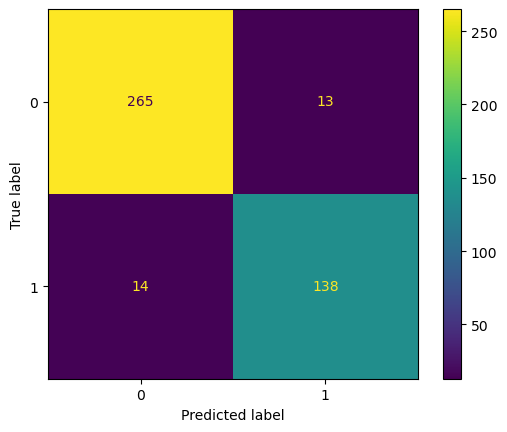

In [39]:
best_dt = results['DT']['best_estimator']
ConfusionMatrixDisplay.from_estimator(best_dt,X_test,y_test)

In [40]:
# inspect the first few levels of the trained tree
from sklearn.tree import export_text

# pull the underlying DecisionTreeClassifier out of the pipeline
dt_clf = best_dt.named_steps['clf']          # 'clf' was the name you gave it
feat_names = best_dt.named_steps['scale'].get_feature_names_out()

print(export_text(dt_clf, feature_names=feat_names))


|--- cont__FunctionalAssessment <= -0.05
|   |--- cont__ADL <= 0.02
|   |   |--- cont__MMSE <= 1.08
|   |   |   |--- cont__BMI <= 1.69
|   |   |   |   |--- cont__DietQuality <= -1.72
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- cont__DietQuality >  -1.72
|   |   |   |   |   |--- class: 1
|   |   |   |--- cont__BMI >  1.69
|   |   |   |   |--- class: 0
|   |   |--- cont__MMSE >  1.08
|   |   |   |--- cont__SymptomCount <= 2.16
|   |   |   |   |--- cont__SleepQuality <= 1.46
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- cont__SleepQuality >  1.46
|   |   |   |   |   |--- class: 1
|   |   |   |--- cont__SymptomCount >  2.16
|   |   |   |   |--- class: 1
|   |--- cont__ADL >  0.02
|   |   |--- cont__SymptomCount <= 0.28
|   |   |   |--- cont__DietQuality <= 1.52
|   |   |   |   |--- cont__CholesterolHDL <= 1.70
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- cont__CholesterolHDL >  1.70
|   |   |   |   |   |--- class: 0
|   |   |   |--- cont__DietQuality >  1.52
|

# 10 Write-up pointeers 

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type { vertical-align: middle; }
    .dataframe tbody tr th             { vertical-align: top;     }
    .dataframe thead th                { text-align: right;       }
</style>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Accuracy</th>
      <th>Precision</th>
      <th>Recall</th>
      <th>F1</th>
      <th>ROC_AUC</th>
      <th>PR_AUC</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>DT</th>
      <td><b style="color:red;">0.937</b></td>
      <td><b style="color:red;">0.914</b></td>
      <td><b style="color:red;">0.908</b></td>
      <td><b style="color:red;">0.911</b></td>
      <td><b style="color:red;">0.921</b></td>
      <td>0.858</td>
    </tr>
    <tr>
      <th>MLP</th>
      <td>0.837</td>
      <td>0.773</td>
      <td>0.763</td>
      <td>0.768</td>
      <td>0.899</td>
      <td><b style="color:red;">0.861</b></td>
    </tr>
    <tr>
      <th>LR</th>
      <td>0.805</td>
      <td>0.683</td>
      <td>0.836</td>
      <td>0.751</td>
      <td>0.885</td>
      <td>0.827</td>
    </tr>
    <tr>
      <th>SVM</th>
      <td>0.795</td>
      <td>0.672</td>
      <td>0.822</td>
      <td>0.740</td>
      <td>0.883</td>
      <td>0.826</td>
    </tr>
  </tbody>
</table>
</div>


Clearly, the <b style="color:red;">Decision Tree</b> remains the top-performing model.  
It delivers the highest F1 (<b>0.911</b>) and the highest ROC-AUC (<b>0.921</b>), so it dominates both the error-trade-off metric we care about (F1) and threshold-free discrimination (ROC-AUC).

For the linear baselines (LR, SVM) the Step-8 comparison shows  
ΔAUC ≈ <b>0.005</b>. That gain is still negligible, so the engineered interaction columns add little to no measurable benefit for these models. We therefore **drop them** for simplicity.

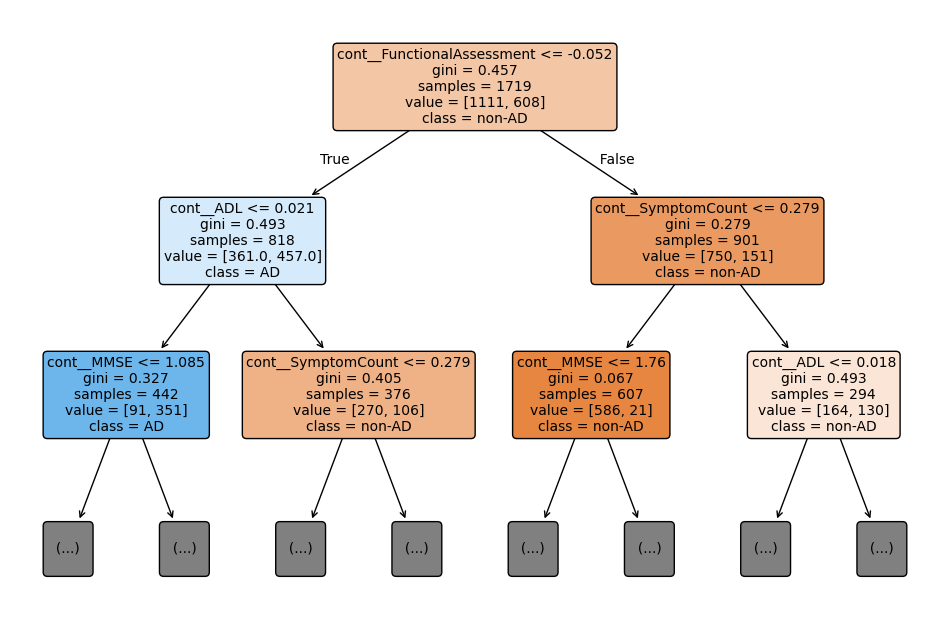

In [58]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(12,8))
tree.plot_tree(
    dt_clf,
    feature_names=feat_names,
    class_names=['non-AD','AD'],
    filled=True,
    rounded=True,
    max_depth=2,      # show only top 3 levels
    fontsize=10
)
plt.show()
